# Acea Smart Water Analytics

The Acea Group is one of the leading Italian multiutility operators. Listed on the Italian Stock Exchange since 1999, the company manages and develops water and electricity networks and environmental services. Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in Lazio, Tuscany, Umbria, Molise, Campania.

In this problem we will focus only on the water sector to help Acea Group preserve precious waterbodies. As it is easy to imagine, a water supply company struggles with the need to forecast the water level in a waterbody (water spring, lake, river, or aquifer) to handle daily consumption. During fall and winter waterbodies are refilled, but during spring and summer they start to drain. To help preserve the health of these waterbodies it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year.

## Data




Given below is the brief description of the 9 datasets:

- **Waterbody: Auser**
Type: Aquifer

Description: This waterbody consists of two subsystems, called NORTH and SOUTH, where the former partly influences the behavior of the latter. Indeed, the north subsystem is a water table (or unconfined) aquifer while the south subsystem is an artesian (or confined) groundwater.

The levels of the NORTH sector are represented by the values of the SAL, PAG, CoS and DIEC wells, while the levels of the SOUTH sector by the LT2 well.

- **Waterbody: Petrignano**
Type: Aquifer

Description: The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.

- **Waterbody: Doganella**
Type: Aquifer

Description: The wells field Doganella is fed by two underground aquifers not fed by rivers or lakes but fed by meteoric infiltration. The upper aquifer is a water table with a thickness of about 30m. The lower aquifer is a semi-confined artesian aquifer with a thickness of 50m and is located inside lavas and tufa products. These aquifers are accessed through wells called Well 1, ..., Well 9. Approximately 80% of the drainage volumes come from the artesian aquifer. The aquifer levels are influenced by the following parameters: rainfall, humidity, subsoil, temperatures and drainage volumes.

- **Waterbody: Luco**
Type: Aquifer

Description: The Luco wells field is fed by an underground aquifer. This aquifer not fed by rivers or lakes but by meteoric infiltration at the extremes of the impermeable sedimentary layers. Such aquifer is accessed through wells called Well 1, Well 3 and Well 4 and is influenced by the following parameters: rainfall, depth to groundwater, temperature and drainage volumes.

- **Waterbody: Amiata**
Type: Water spring

Description: The Amiata waterbody is composed of a volcanic aquifer not fed by rivers or lakes but fed by meteoric infiltration. This aquifer is accessed through Ermicciolo, Arbure, Bugnano and Galleria Alta water springs. The levels and volumes of the four sources are influenced by the parameters: rainfall, depth to groundwater, hydrometry, temperatures and drainage volumes.

- **Waterbody: Madonna di Canneto**
Type: Water spring

Description: The Madonna di Canneto spring is situated at an altitude of 1010m above sea level in the Canneto valley. It does not consist of an aquifer and its source is supplied by the water catchment area of the river Melfa.

- **Waterbody: Lupa**
Type: Water spring

Description: this water spring is located in the Rosciano Valley, on the left side of the Nera river. The waters emerge at an altitude of about 375 meters above sea level through a long draining tunnel that crosses, in its final section, lithotypes and essentially calcareous rocks. It provides drinking water to the city of Terni and the towns around it.

- **Waterbody: Arno**
Type: River

Description: Arno is the second largest river in peninsular Italy and the main waterway in Tuscany and it has a relatively torrential regime, due to the nature of the surrounding soils (marl and impermeable clays). Arno results to be the main source of water supply of the metropolitan area of Florence-Prato-Pistoia. The availability of water for this waterbody is evaluated by checking the hydrometric level of the river at the section of Nave di Rosano.

- **Waterbody: Bilancino**
Type: Lake

Description: Bilancino lake is an artificial lake located in the municipality of Barberino di Mugello (about 50 km from Florence). It is used to refill the Arno river during the summer months. Indeed, during the winter months, the lake is filled up and then, during the summer months, the water of the lake is poured into the Arno river.

## Business problem

The solution we are aiming to provide is to **predict the amount of water in each unique waterbody**. So that on gaining a better understanding of volumes, Acea Group will be able to ensure water availability to the consumers for each time interval of the year. A time interval may be on a daily or monthly basis depending on the available time measures of each waterbody.

Each waterbody has its own different features to be predicted. 
We return **four mathematical models**, one for each category of waterbody. The predictive power of the models is evaluated with both **Median Absolute Error (MAE)** , **Root Mean Square Log Error (RMSE)** and **R_squared (R2)**.

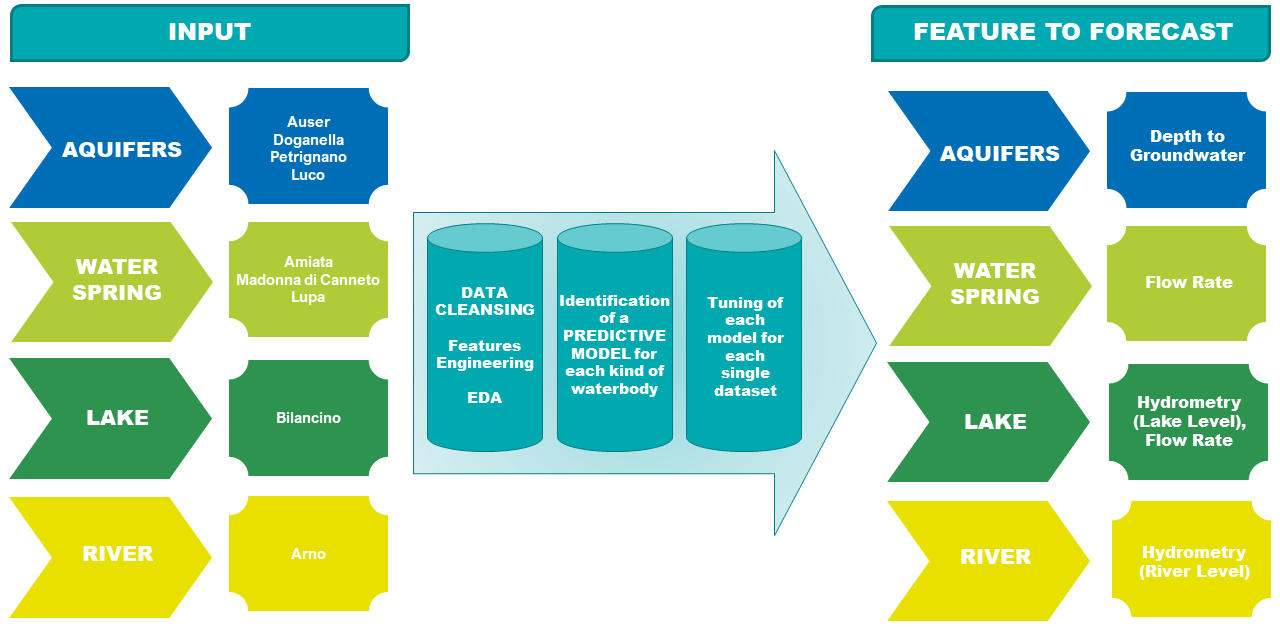

# Exploratory Data Analysis (EDA)

Let us first analyze the role of each feature of a waterbody category (water spring, lake, river, or aquifer) in the prediction of their respective target feature. This is done using EDA as below:

## Read data and find insights in datasets

Let's import some basic required packages.

In [1]:
#  Import some data manipulation and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Read datasets

In [33]:
# Read all the given datasets into separate dataframes
aquifer_auser = pd.read_csv("acea-water-prediction/Aquifer_Auser.csv")
aquifer_doganella = pd.read_csv("acea-water-prediction/Aquifer_Doganella.csv")
aquifer_luco = pd.read_csv("acea-water-prediction/Aquifer_Luco.csv")
aquifer_petrignago = pd.read_csv("acea-water-prediction/Aquifer_Petrignano.csv")
lake_bilancino = pd.read_csv("acea-water-prediction//Lake_Bilancino.csv")
river_arno = pd.read_csv("acea-water-prediction//River_Arno.csv")
spring_amiata = pd.read_csv("acea-water-prediction//Water_Spring_Amiata.csv")
spring_lupa = pd.read_csv("acea-water-prediction/Water_Spring_Lupa.csv")
spring_madonna = pd.read_csv("acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv")

In [34]:
# put them all in a list to simplify iterating for EDA purpose
water_bodies_datasets = [ aquifer_auser, aquifer_doganella, aquifer_luco, aquifer_petrignago,
                         lake_bilancino, river_arno, spring_amiata, spring_lupa, spring_madonna]

water_bodies_names = ['Aquifer_Auser', 'Aquifer_Doganella', 'Aquifer_Luco', 'Aquifer_Petrignano',
                    'Lake_Bilancino','River_Arno', 'Water_Spring_Amiata','Water_Spring_Lupa',
                      'Water_Spring_Madonna_di_Canneto']

### General properties and statistics of each dataset

In [35]:
#Iterate over all 9 datasets
for wb in range(9):
    print('='*80)
    print(' '*25,water_bodies_names[wb].upper(),' '*25)
    print('\n')
    
    #Print the number of rows and columns in a dataset
    print('Number of records: {}    Number of features: {}'.format(water_bodies_datasets[wb].shape[0],
                                                                water_bodies_datasets[wb].shape[1]))
    print('\n')
    
    #Check for presence of missing values - NANs if any
    print('Do missing values exist in any feature? :', water_bodies_datasets[wb].isnull().values.any())
    print('\n')
    
    #Print all the unique datatypes in all columns in the dataset
    print('Unique data types of features: \n\n',water_bodies_datasets[wb].dtypes.unique())
    print('\n')
    
    #Print non-null count, dtypes with column name of each column
    print('General information of complete dataset: \n\n')
    water_bodies_datasets[wb].info()
    print('\n')
    
    #Print stats like count, mean, standard dev etc of each column
    print('Summary of statistics of the numerical value features: \n\n',water_bodies_datasets[wb].describe().T)

                          AQUIFER_AUSER                          


Number of records: 8154    Number of features: 27


Do missing values exist in any feature? : True


Unique data types of features: 

 [dtype('O') dtype('float64')]


General information of complete dataset: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non

                                count         mean          std     min  \
Rainfall_Monteporzio          5399.0     2.893758     8.624455    0.00   
Rainfall_Velletri             5374.0     3.159732     8.913341    0.00   
Depth_to_Groundwater_Pozzo_1  2537.0   -36.929137    10.179111  -59.50   
Depth_to_Groundwater_Pozzo_2  2736.0   -94.746188     3.891286 -112.50   
Depth_to_Groundwater_Pozzo_3  2774.0  -111.638928     3.809581 -117.80   
Depth_to_Groundwater_Pozzo_4  2374.0   -98.223934     2.391763 -108.66   
Depth_to_Groundwater_Pozzo_5  2508.0  -102.552596     3.711563 -109.89   
Depth_to_Groundwater_Pozzo_6  2428.0   -91.672955     2.216446  -99.48   
Depth_to_Groundwater_Pozzo_7  2311.0   -95.819225     1.686417  -97.43   
Depth_to_Groundwater_Pozzo_8  2551.0   -95.845370     2.523905 -107.50   
Depth_to_Groundwater_Pozzo_9  2339.0   -94.709701     3.778746 -105.94   
Volume_Pozzo_1                1356.0  1529.376211  1154.952073    0.00   
Volume_Pozzo_2                1360.0 

Summary of statistics of the numerical value features: 

                             count       mean       std  min    25%    50%  \
Rainfall_Le_Croci          6026.0   3.129871  8.025121  0.0   0.00   0.00   
Rainfall_Cavallina         6026.0   2.674743  7.655847  0.0   0.00   0.00   
Rainfall_S_Agata           6026.0   2.670063  7.166643  0.0   0.00   0.00   
Rainfall_Mangona           6026.0   3.340657  8.903134  0.0   0.00   0.00   
Rainfall_S_Piero           6026.0   2.471225  6.650012  0.0   0.00   0.00   
Rainfall_Vernio            4283.0   3.416437  9.425358  0.0   0.00   0.00   
Rainfall_Stia              1283.0   2.538893  6.502917  0.0   0.00   0.00   
Rainfall_Consuma           1283.0   3.416680  8.938863  0.0   0.00   0.00   
Rainfall_Incisa            4568.0   2.335026  6.347652  0.0   0.00   0.00   
Rainfall_Montevarchi       1647.0   2.056709  6.117967  0.0   0.00   0.00   
Rainfall_S_Savino          1283.0   2.426500  7.234140  0.0   0.00   0.00   
Rainfall_Laterina 

**Observations**:
- The Aquifer Auser has 8154 observations with 27 features including date. The date column is object type and rest are having float type. Only the Date and temperature features have all non-null values. Max Rainfall recorded in any area is 318.8 mm, temperature recorded in any area is minimum at -7.85 to 31.05 °C, minimum volume of water at -14438.30 and maximum at -4114.67 cubic meters and minimum hydrometry at -1.19 and maximum at 3.69 metres. It shows minimum depth to maximum at -15.31 metres from ground at LT2 and minimum at 0 m.
- The Aquifer Doganella has 6026 observations with 22 features including date. The date column is object type and rest are having float type. Only the Date feature has all non-null values. Max Rainfall recorded in any area is 112.6 mm, temperature recorded in any area is minimum at -3.62 to 31.90 °C, maximum volume of water at 8360.21 cubic meters. It shows maximum depth to groundwater at -117.8 metres from ground at Pozzo3 and minimum at -20.31 m at Pozzo1.
- The Aquifer Luca has 7487 observations with 22 features including date. The date column is object type and rest are having float type. Only the Date and temperature features has all non-null values. Max Rainfall recorded in any area is 794 mm, temperature recorded in any area is minimum at -5.25 to 31.85 °C, maximum volume of water at -295.37 cubic meters. It shows maximum depth to groundwater at -295.37 metres from ground at Pozzo3 and minimum at 0 m at Pozzo3.
- The Aquifer Petrignano has 5223 observations with 8 features including date. The date column is object type and rest are having float type. Only the Date feature has all non-null values. Max Rainfall recorded in any area is 67.30 mm, temperature recorded in any area is minimum at -4.2 to 33 °C, maximum volume of water at -45544.896 cubic meters. It shows maximum depth to groundwater at -34.47 metres from ground at P24 and minimum at -19.10 m at P24.
- The Lake Bilancino has 6603 observations with 9 features including date. The date column is object type and rest are having float type. Only the Date and Lake Level features have all non-null values. Max Rainfall recorded in any area is 120.20 mm, temperature recorded in any area is minimum at -5.35 to maximum 34 °C. It shows maximum lake level at 243.53 metres and minimum at 252.76. It shows maximum flow rate at 0.31 and minimum at 74.65 cubic meters per seconds.
- The River Arno has 8217 observations with 17 features including date. The date column is object type and rest are having float type. Only the Date and Lake Level features have all non-null values. Max Rainfall recorded in any area is 126 mm, temperature recorded in any area is maximum at 34.9 °C. It shows maximum lake level at 243.53 metres and minimum at 252.76. It shows maximum hydrometry at 6.75 meters.
- The water spring Amiata has 7487 observations with 16 features including date. The date column is object type and rest are having float type. Only the Date and Temperature_S_Fiora features have all non-null values. Max Rainfall recorded in any area is 228.5 mm, temperature recorded in any area is minimum at -8.95 to maximum 30.15 °C. It shows minimum flow rate at -26.08 and maximum at 0 litres per seconds.
- The water spring Lupa has 4199 observations with 3 features including date. The date column is object type and rest are having float type. Only the Date and Rainfall_Terni features have all non-null values. Max Rainfall recorded in any area is 76 mm. It shows minimum flow rate at -182.31 and maximum at 0 litres per seconds.
- The water spring Madonna Di Canneto has 3113 observations with 4 features including date. The date column is object type and rest are having float type. No features have all non-null values. Max Rainfall recorded in any area is 140.8 mm, temperature recorded in any area is minimum at -4.9 to maximum 31.1 °C. It shows minimum flow rate at 187.7 and maximum at 300.16 litres per seconds.

Let's see what is the percentage of missing values in each feature in each dataset.

### Missing value count in each feature



                                                   AQUIFER_AUSER                                                   




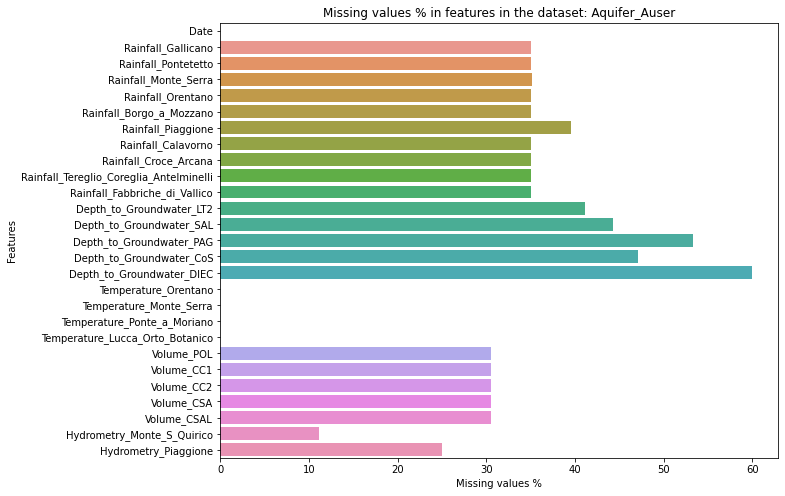



                                                   AQUIFER_DOGANELLA                                                   




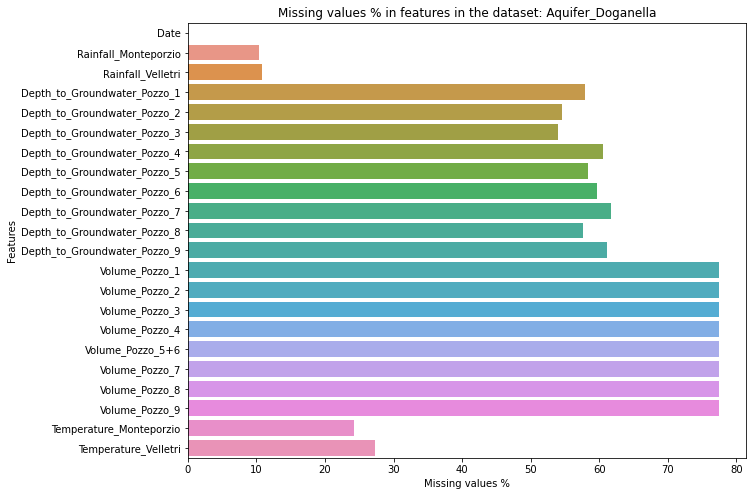



                                                   AQUIFER_LUCO                                                   




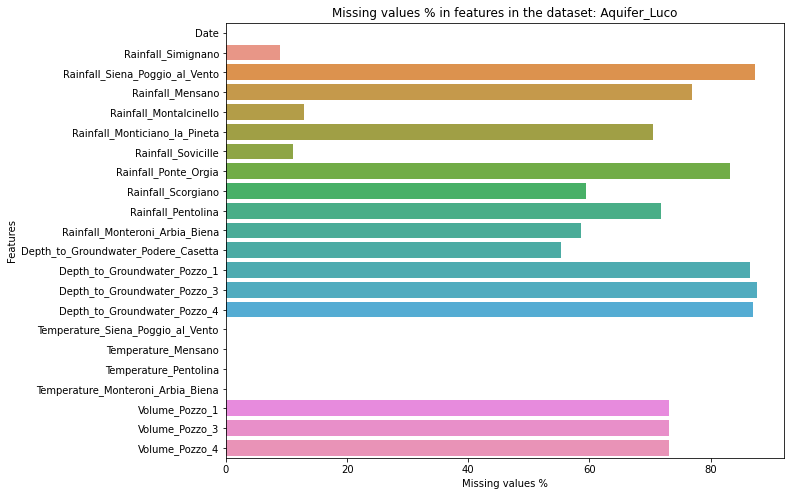



                                                   AQUIFER_PETRIGNANO                                                   




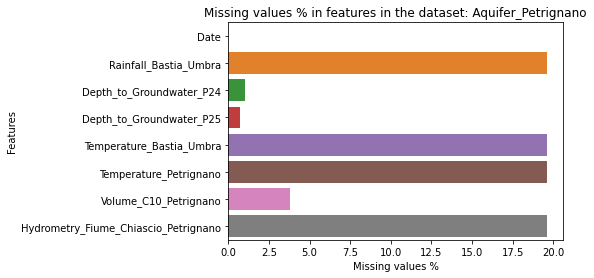



                                                   LAKE_BILANCINO                                                   




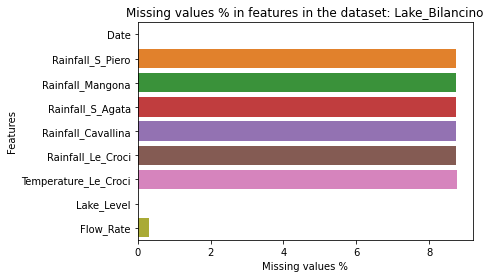



                                                   RIVER_ARNO                                                   




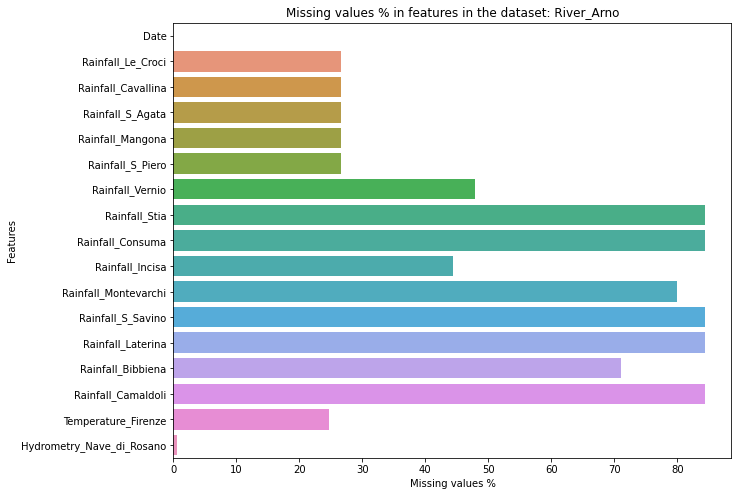



                                                   WATER_SPRING_AMIATA                                                   




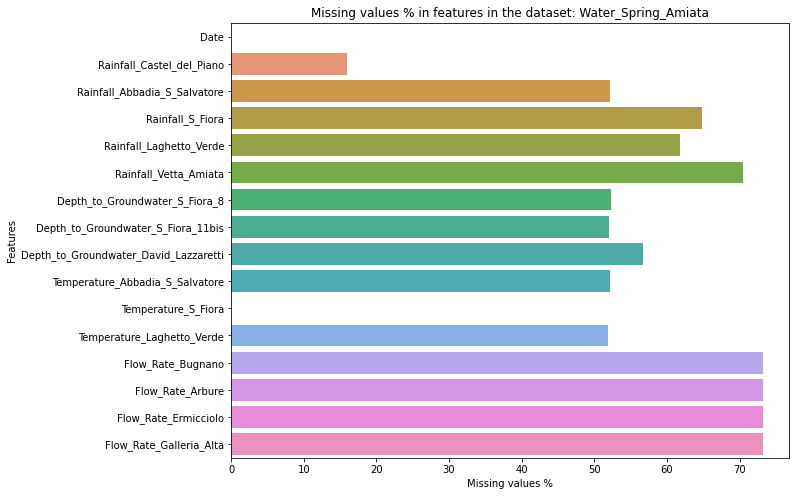



                                                   WATER_SPRING_LUPA                                                   




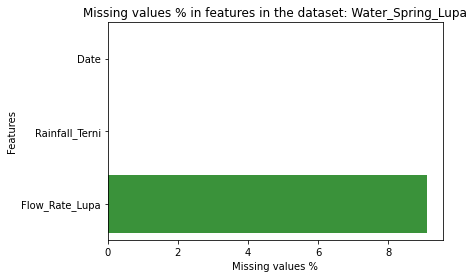



                                                   WATER_SPRING_MADONNA_DI_CANNETO                                                   




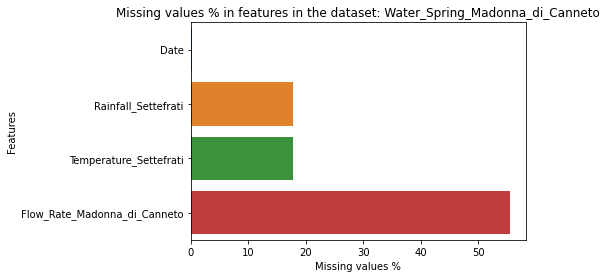

In [36]:
#Iterate over all 9 datasets
for wb in range(9):
    print('='*120)
    print('\n')
    print(' '*50,water_bodies_names[wb].upper(),' '*50)
    print('\n')
    
    #calculate the count and percentage of missing values in ach column of the dataset
    missing_count = water_bodies_datasets[wb].isnull().sum()
    missing_perc = (missing_count/len(water_bodies_datasets[wb]))*100
    
    # create a dataframe with the missing count and missing percentage values
    missing_df = pd.DataFrame(missing_count,missing_perc)
    
    #if number of features is greater than 10 then we create a larger figure size for better visuals
    if(len(water_bodies_datasets[wb].columns)>10):
        plt.figure(figsize=(10,8))
        
    # plot a barplot with missing values % and feature names
    sns.barplot(y = missing_count.index, x = missing_perc.values,data = missing_df,orient='h')
    #set the plot x label, y label and the figure's title
    plt.title('Missing values % in features in the dataset: '+water_bodies_names[wb])
    plt.ylabel('Features')
    plt.xlabel('Missing values %')
    plt.show()

**Observations:**
- For Aquifer Auser, the maximum number of missing values is in feature Depth_to_Groundwater_DIEC with about 60% missing values and apart from the non-null features, the minimum number of missing values is in feature Hydrometry_Monte_S_Quirico with about 11% missing values.
- For Aquifer Doganella, the maximum number of missing values is in the Volume features with about 78% missing values and apart from the non-null features, the minimum number of missing values is in Rainfall features with about 10% missing values.
- For Aquifer Luco, the maximum number of missing values is in the features of Depth_to_Groundwater and Rainfall_Siena_Poggio_al_Vento and Rainfall_Ponte_Orgia with about 80 to 85% missing values and apart from the non-null features, the minimum number of missing values is in feature Rainfall_Simignano with about 6% missing values.
- For Aquifer Petrignago, the maximum number of missing values is in the features Rainfall_Bastia_Umbra, Temperature_Bastia_Umbra, Temperature_Petrignano and Hydrometry_Fiume_Chiascio_Petrignano with about 20% missing values and apart from the non-null features, the minimum number of missing values is in feature Depth_to_Groundwater_P24, Depth_to_Groundwater_P25 with about 1% missing values.
- For Lake Bilancino, the maximum number of missing values is in the Rainfall and Temperature features with about 85% missing values and apart from the non-null features, the minimum number of missing values is in feature Flow_Rate with about 0.2% missing values.
- For River Arno, the maximum number of missing values is in features Rainfall_Stia, Rainfall_Consuma, Rainfall_Montevarchi,  Rainfall_S_Savino, Rainfall_Laterina, Rainfall_Camaldoli with about 85% missing values and apart from the non-null features, the minimum number of missing values is in feature Hydrometry_Nave_di_Rosano with about 1% missing values.
- For Water Spring Amiata, the maximum number of missing values is in feature Rainfall_S_Fiora, Rainfall_Laghetto_Verde, Rainfall_Vetta_Amiata and Flow Rate features with about 72% missing values and apart from the non-null features, the minimum number of missing values is in feature Rainfall_Castel_del_Piano with about 15% missing values.
- For Water Spring Lupa, the maximum number of missing values is in feature Flow_Rate_Lupa with about 9% missing values
- For Water Spring Madonna Di Canneto, the maximum number of missing values is in feature Flow_Rate_Madonna_di_Canneto with about 55% missing values and apart from the non-null features, the minimum number of missing values is in features Rainfall_Settefrati and Temperature_Settefrati with about 18% missing values.

### Correlation in features

****************************************************************************************************************************************************************************************************************************


                                                   AQUIFER_AUSER                                                   




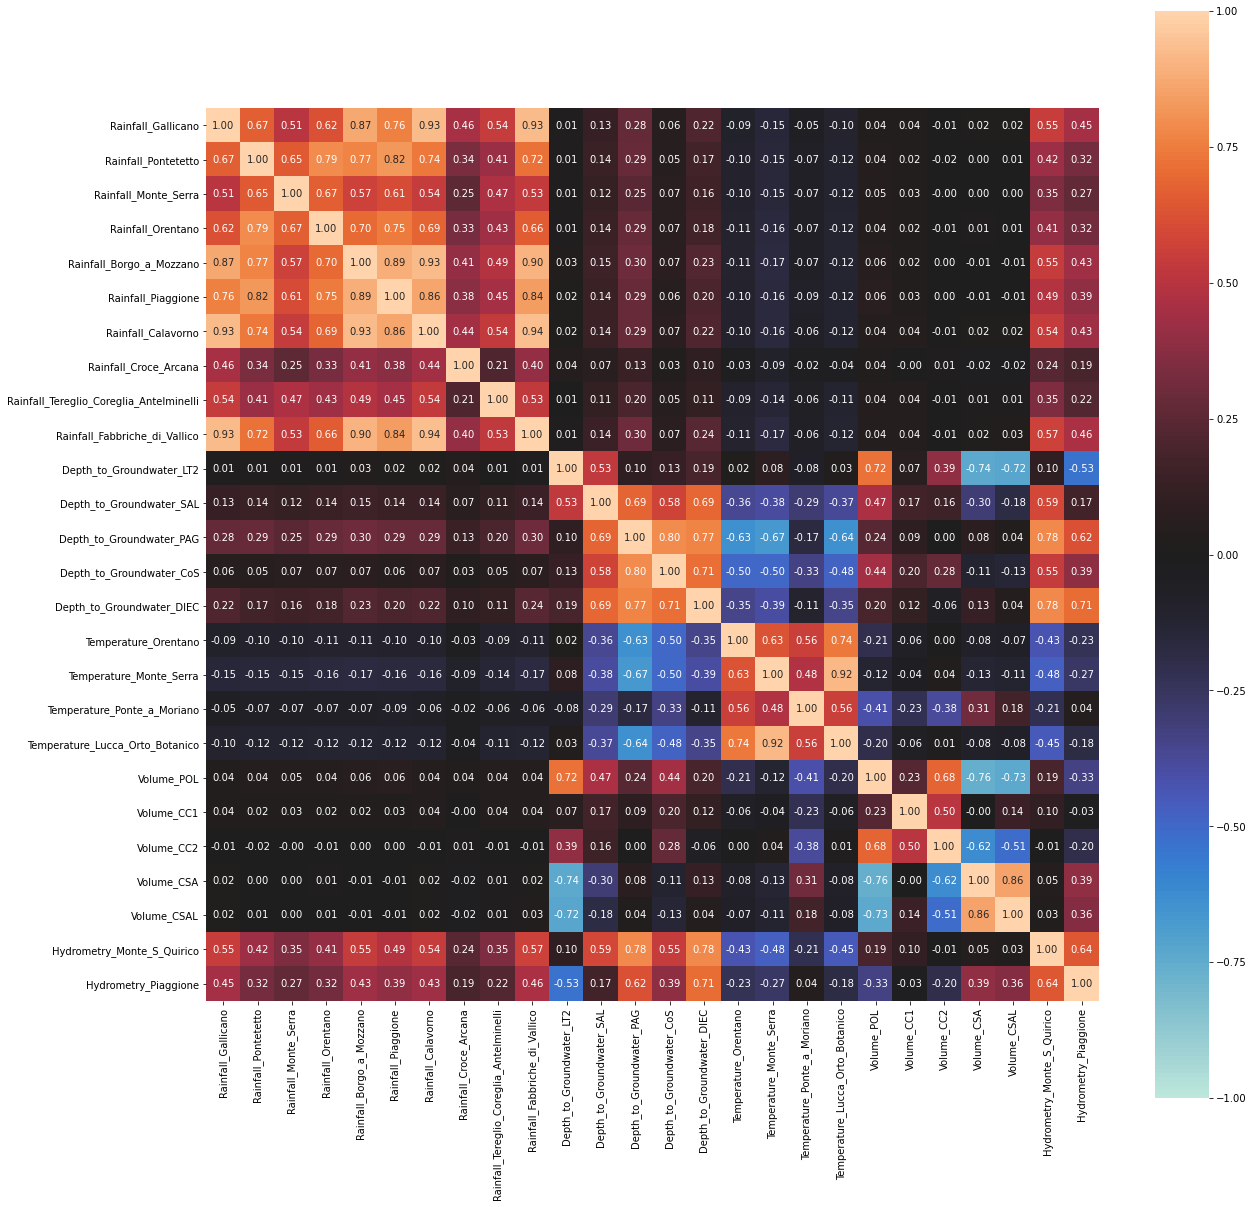

****************************************************************************************************************************************************************************************************************************


                                                   AQUIFER_DOGANELLA                                                   




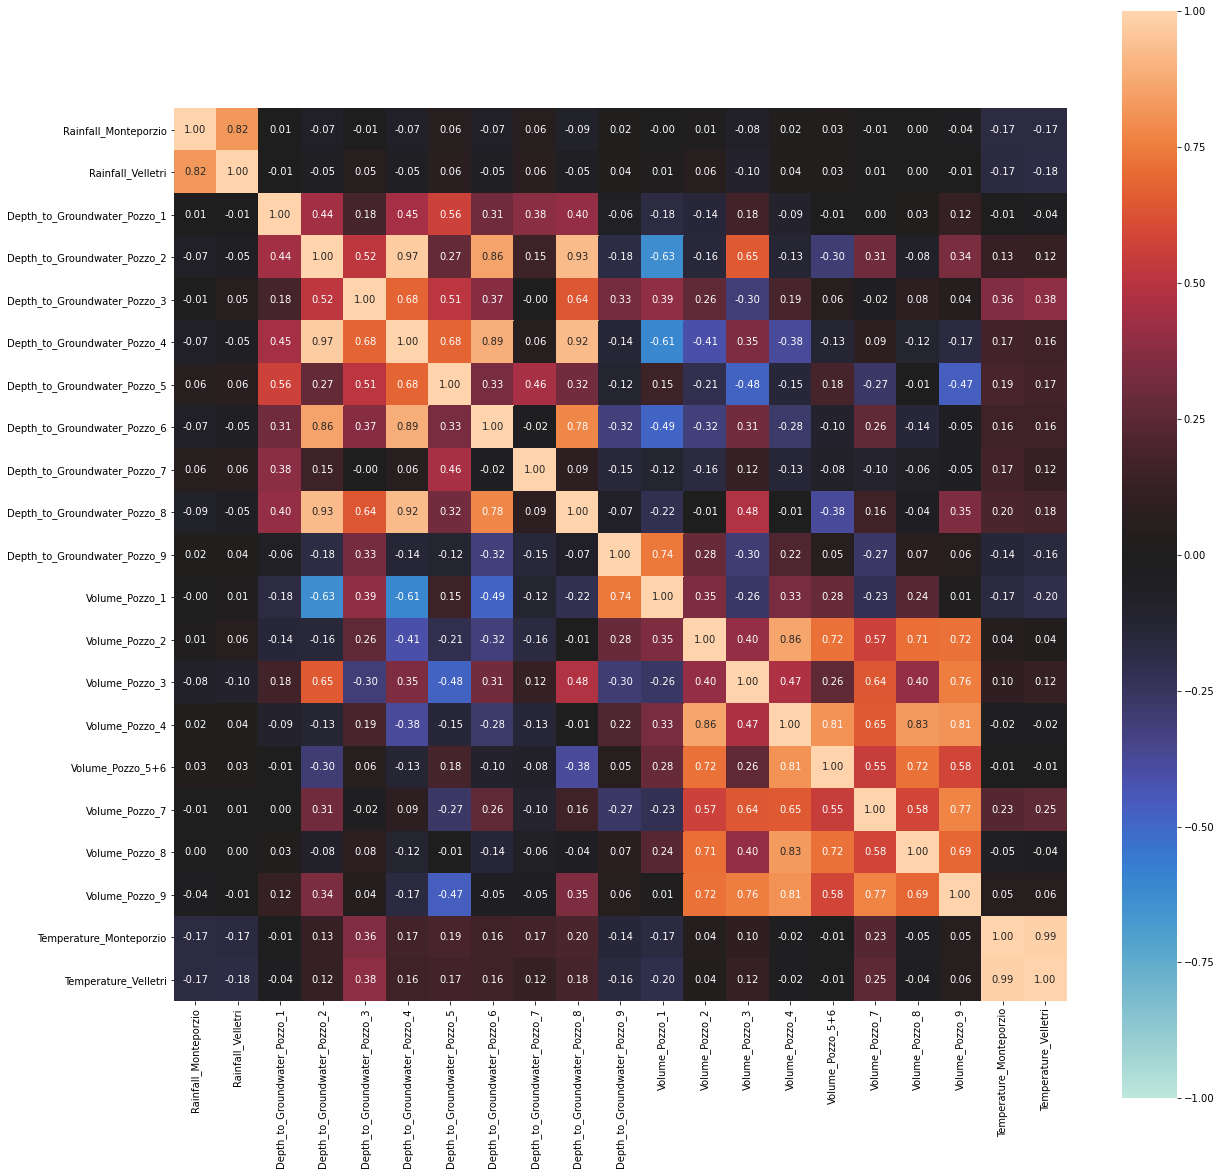

****************************************************************************************************************************************************************************************************************************


                                                   AQUIFER_LUCO                                                   




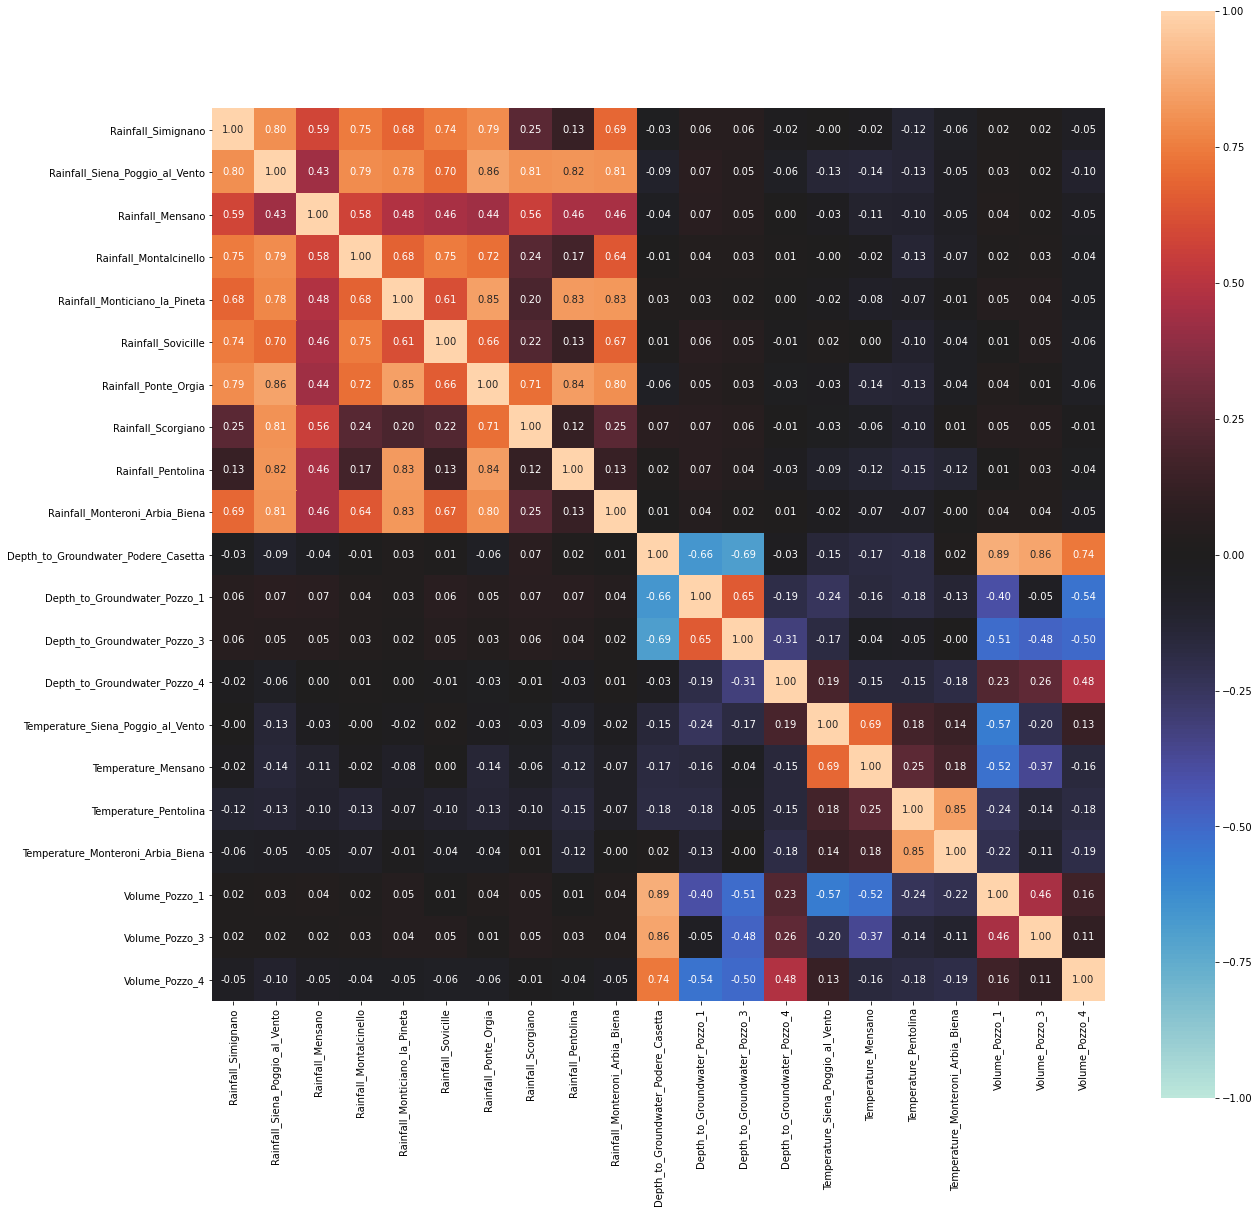

****************************************************************************************************************************************************************************************************************************


                                                   AQUIFER_PETRIGNANO                                                   




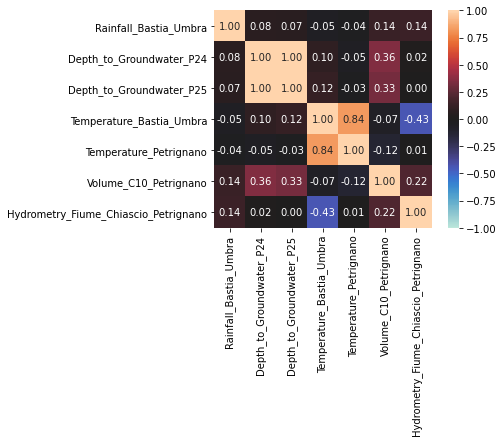

****************************************************************************************************************************************************************************************************************************


                                                   LAKE_BILANCINO                                                   




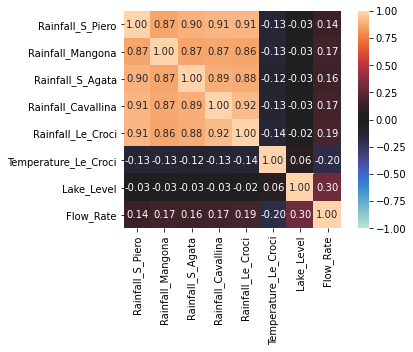

****************************************************************************************************************************************************************************************************************************


                                                   RIVER_ARNO                                                   




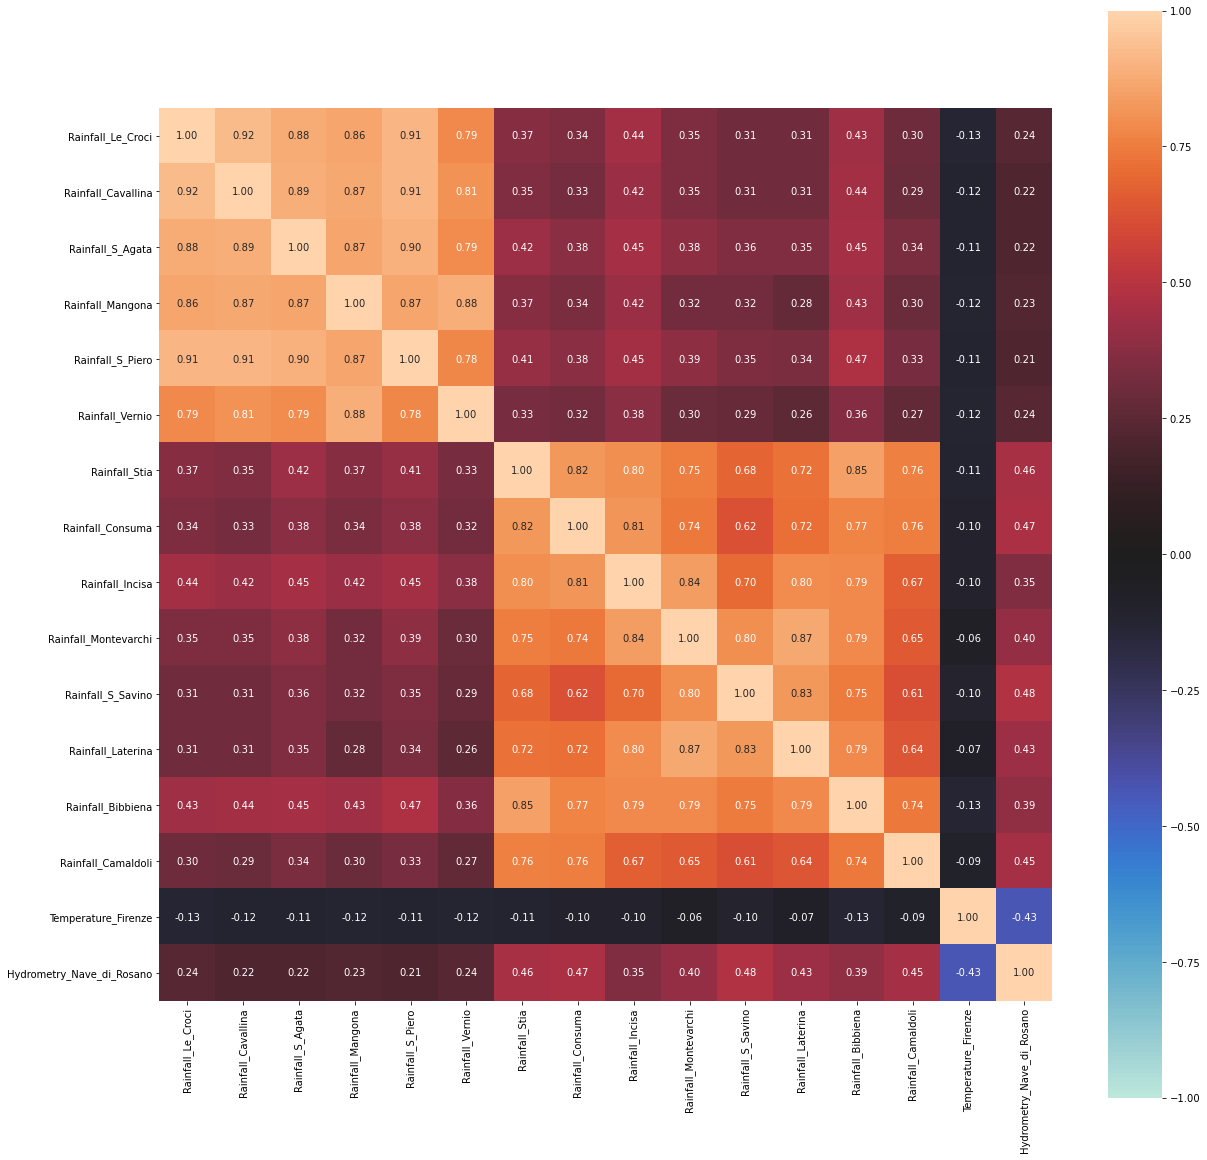

****************************************************************************************************************************************************************************************************************************


                                                   WATER_SPRING_AMIATA                                                   




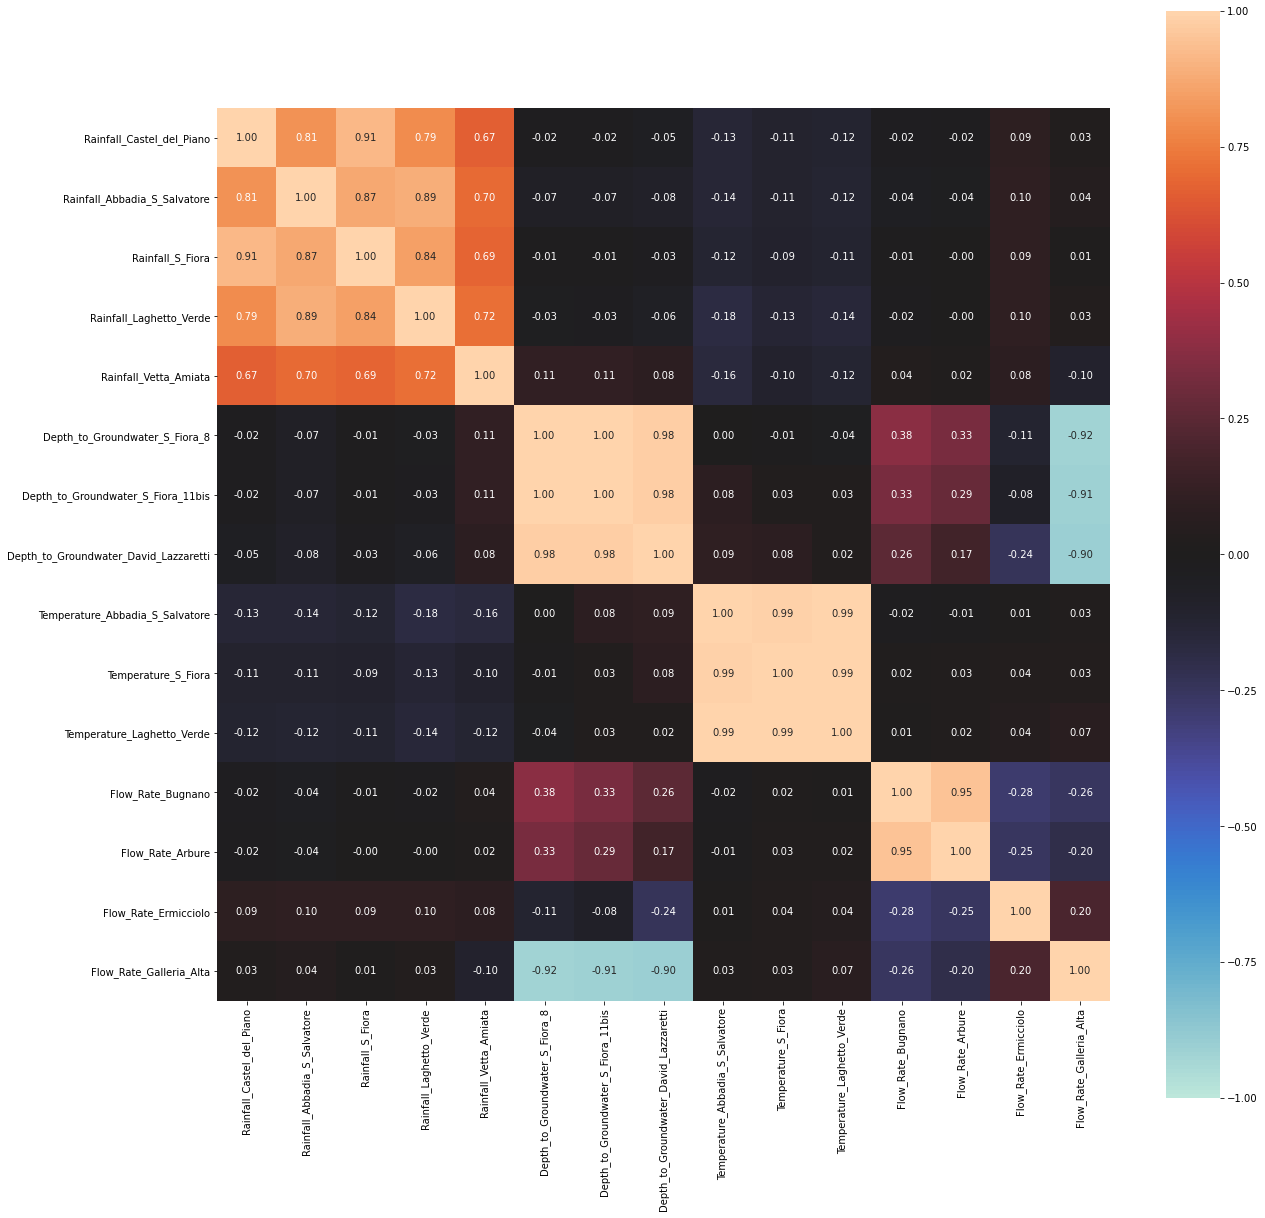

****************************************************************************************************************************************************************************************************************************


                                                   WATER_SPRING_LUPA                                                   




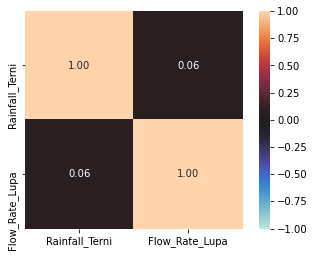

****************************************************************************************************************************************************************************************************************************


                                                   WATER_SPRING_MADONNA_DI_CANNETO                                                   




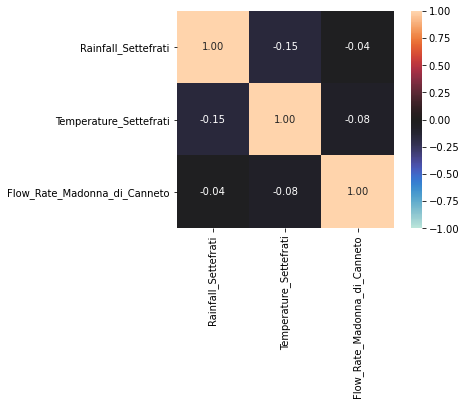

In [37]:
# Iterate over all 9 datasets
for wb in range(9):
    print('='*120)
    print('\n')
    print(' '*50,water_bodies_names[wb].upper(),' '*50)
    print('\n')
    
    #if number of features is greater than 10 then we create a larger figure size for better visuals
    if(len(water_bodies_datasets[wb].columns)>10):
        plt.figure(figsize=(20,20))
        
        
    # plot heartmap to find correlation in the dataset features
    sns.heatmap(water_bodies_datasets[wb].corr(),annot=True, fmt='.2f',vmin=-1, vmax=1, center=0, cmap='Blues', square=True)
    plt.show()

**Observations:**
- For Aquifer Auser, positively strongly correlated features are Rainfall_Gallicano, Rainfall_Borgo_a_Mozzano, Rainfall_Calavorno, Rainfall_Fabbriche_di_Vallico, Rainfall_Piaggione and negatively strongly correlated features are Volume_CSA, Volume_CSAL,Volume_POL, Depth_to_Groundwater_LT2, Depth_to_Groundwater_LT2.
- For Aquifer Doganella, positively strongly correlated features are Rainfall_Velletri, Depth_to_Groundwater_Pozzo_2, Depth_to_Groundwater_Pozzo_4, Depth_to_Groundwater_Pozzo_6, Depth_to_Groundwater_Pozzo_8, Volume_Pozzo_8, Volume_Pozzo_9 and negatively strongly correlated features are Volume_Pozzo_1, Depth_to_Groundwater_Pozzo_2, Depth_to_Groundwater_Pozzo_4.
- For Aquifer Luco, positively strongly correlated features are Rainfall_Simignano, Rainfall_Siena_Poggio_al_Vento, Rainfall_Monticiano_la_Pineta, Rainfall_Ponte_Orgia,Rainfall_Monteroni_Arbia_Biena, Depth_to_Groundwater_Podere_Casetta, Volume_Pozzo_1, Volume_Pozzo_3 and negatively strongly correlated features are Depth_to_Groundwater_Podere_Casetta, Depth_to_Groundwater_Pozzo_1, Depth_to_Groundwater_Pozzo_3.
- For Aquifer Petrignago, positively strongly correlated features are Depth_to_Groundwater_P24, Depth_to_Groundwater_P25, Temperature_Bastia_Umbra, Temperature_Petrignano and negatively correlated features are Temperature_Bastia_Umbra, Hydrometry_Fiume_Chiascio_Petrignano.
- For Lake Bilancino, positively strongly correlated features are Rainfall_S_Piero, Rainfall_Mangona, Rainfall_S_Agata, Rainfall_Cavallina, Rainfall_Le_Croci and no features are strongly negatively correlated.
- For River Arno, positively strongly correlated features are all rainfall features and temperature feature is weakly negatively correlated.
- For Water Spring Amiata, positively strongly correlated features are all rainfall features, all temperature features, all depth to groundwater features, Flow_Rate_Bugnano, Flow_Rate_Arbure and Flow_Rate_Galleria_Alta feature is negatively correlated feature to all depth to groundwater features.
- For Water Spring Lupa, rainfall and flow rate features are not much correlated.
- For Water Spring Madonna, rainfall,temperature and flow rate features are not much correlated or weakly negatively correlated.

### CDF, Boxplot and Histogram of features



                                                   AQUIFER_AUSER                                                   




AttributeError: 'Line2D' object has no property 'fill'

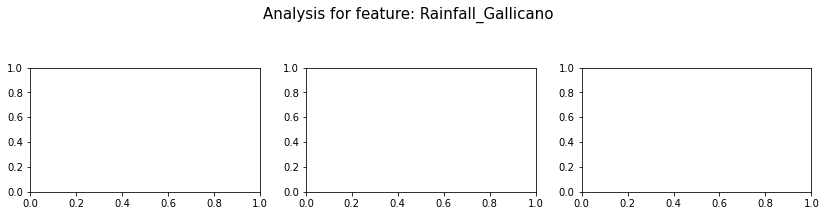

In [45]:
# Iterate over 9 datasets
for wb in range(9):
    print('='*120)
    print('\n')
    print(' '*50,water_bodies_names[wb].upper(),' '*50)
    print('\n')
    
    #remove the date feature
    dataset = water_bodies_datasets[wb].drop(['Date'],axis=1)
    
    #for all features, plot the cdf, boxplot, histogram
    for col in dataset.columns:
        fig, axes = plt.subplots(1, 3, figsize = (14,3))
        fig.suptitle('Analysis for feature: '+col,fontsize=15)
        fig.subplots_adjust(top=0.7) 
        sns.kdeplot(np.array(dataset[col]), cumulative= True,fill=True,palette="crest",alpha=.5, ax = axes[0])
        sns.boxplot(dataset[col], ax = axes[1])
        sns.distplot(dataset[col], ax = axes[2])
        
        #set titles for each plot
        axes[0].set_title('CDF')
        axes[1].set_title('Boxplot')
        axes[2].set_title('Histogram')
        plt.show()

**Observations:**
- In Aquifer Auser, more than 80% of data in the rainfall features lie below 10 mm, there are considerable number of outliers till range of upto 300mm. Depth to groundwater features are having a wider and peaked distribution of values within a few meters and fewer outliers. Temperature feature values are widely distributed over a few tens of degrees. There are no outliers. Volume_CSA and Volume_CSAL features have about 40% values less than -2000 cubic metres and rest of them are mostly around 0. Hydrometry feature values majorly vary between -1 to 1 meters and also some outliers.

- In Aquifer Doganella, more than 80% of data in the rainfall features lie below 10 mm, there are considerable number of outliers till range of upto 100mm. Depth to groundwater features are having a wider distribution of values with multiple peaks and within a few tens meters and fewer outliers. Temperature feature values are widely distributed over a few tens of degrees. There are no outliers. Volume features are mostly skewed and have lots of outliers. 

- In Aquifer Luco, more than 80% of data in the rainfall features lie below 10 mm, there are considerable number of outliers till range of upto 100mm. Depth to groundwater features are having a wider distribution of values with multiple peaks and within a few tens meters and fewer outliers. Temperature feature values are widely distributed over a few tens of degrees. There are no outliers. Volume features are well distributed with median volume about -150 cubic meters and don't have outliers. 

- In Aquifer Petrignano, all features are well distributed and don't have many outliers except for Rainfall_Bastia_Umbra, Volume_C10_Petrignano, Hydrometry_Fiume_Chiascio_Petrignano.

- In Lake Bilancino, rainfall features and flow rate features have majority of values concentrated in a small range lots of outliers. Temperature and lake level features are well distributed and have no outliers.

- In River Arno, more than 80% of data in the rainfall features lie below 5 mm, there are considerable number of outliers till range of upto 120 mm. Temperature feature values are widely distributed over a few tens of degrees. There are no outliers. Hydrometry feature values 80% are upto 2 meters and also has some outliers.

- In water spring amiata, more than 80% of data in the rainfall features lie below 5 mm, there are considerable number of outliers till range of upto 120 mm. Depth to groundwater, Temperature feature and flow rate values are multipeaked, widely distributed with minimal outliers.

- In water spring Lupa, more than 80% of data in the rainfall features lie below 10 mm, there are considerable number of outliers till range of upto 70 mm. Median flow rate is about -100 and a few outliers till -150 litre/sec.

- In water spring Madonna di canetto, more than 80% of data in the rainfall features lie below 10 mm, there are considerable number of outliers till range of upto 130 mm. Temperature feature values are widely distributed over a few tens of degrees. There are no outliers. flow rate has multiple peaks with a median at 280 litre/sec.

## Target feature analysis

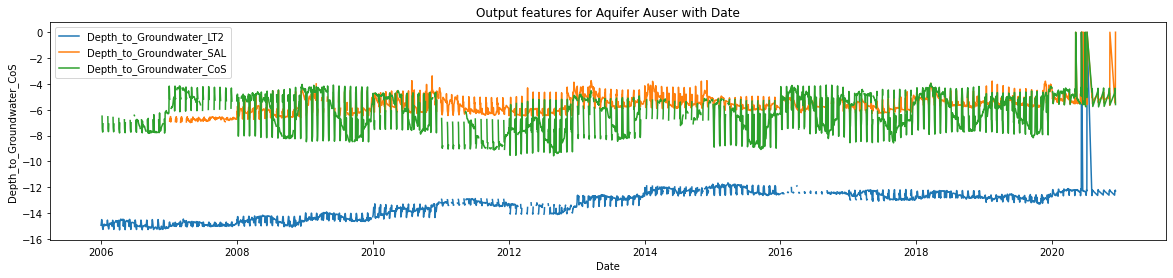

In [47]:
# Plot the depth to groundwater with date for Aquifer Auser
plt.figure(figsize=(20,4))
plt.title('Output features for Aquifer Auser with Date')
line_colors = ['darkblue','turquoise','lightblue']
for c,col in enumerate(['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL','Depth_to_Groundwater_CoS']):
    sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser[col].replace({np.nan : np.inf}),
                label=col,color=line_colors[c])

**Observations:**:
- The Depth to groundwater of LT2 was the deepest in 2006 (earlier data is missing) at -15 m, then it is seen to be gradually decreasing over the years and around initial 2020 it hit the lowest for a brief period and then closed at around -12 meters.
- The Depth to groundwater of CoS lie somewhere in the range of -4 to -8 m  throughout the years data and closes at -4 m.
- The Depth to groundwater of SAL was the deepest in 2006 (earlier data is missing) at -7 m, subsequently, the range varies between -4 to -8 over the years and in 2020, it is recorded approximately -7 m.

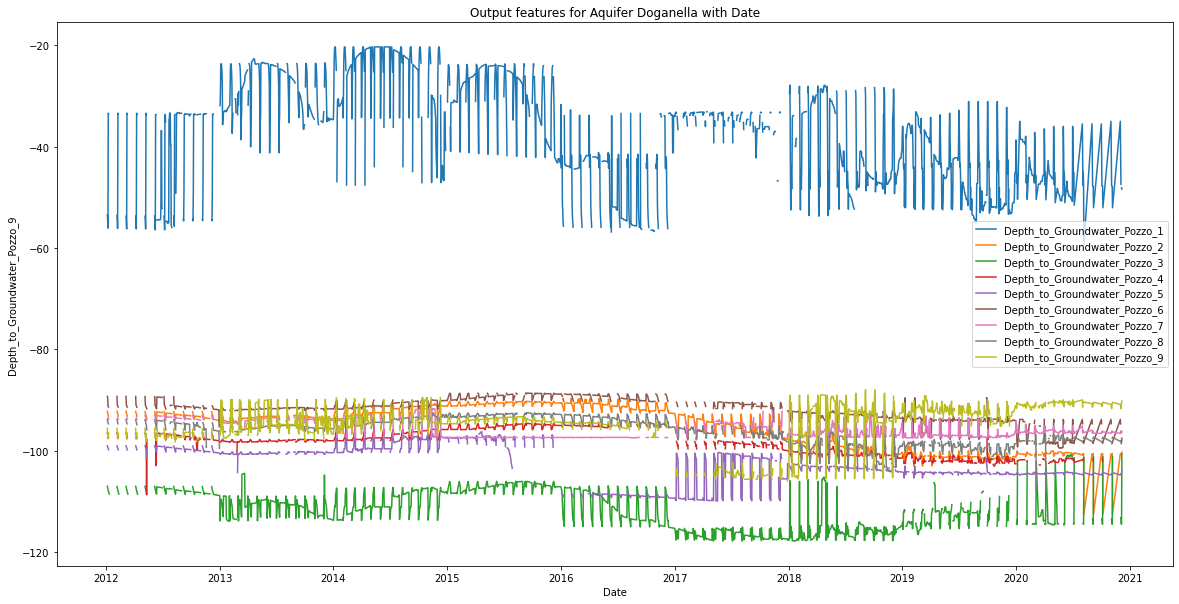

In [48]:
# Plot the depth to groundwater with date for Aquifer Doganella
plt.figure(figsize=(20,10))
plt.title('Output features for Aquifer Doganella with Date')
line_colors = ['skyblue','turquoise','lightblue','seagreen','indigo','darkgreen','aqua','darkblue','black']
for c,col in enumerate(['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2', 'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
               'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6', 'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
              'Depth_to_Groundwater_Pozzo_9']):
    sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella[col].replace({np.nan : np.inf}),
                label=col,color=line_colors[c])

**Observations:**
- The Depth to Groundwater Pozzo1 was observed on average around -40 m in 2012, after that it started decreasing in later years then improved back at closed at -40 m before 2021.
- The Depth to Groundwater Pozzo3, Pozzo5 and Pozzo8 show remarkable improvement since the initial recordings in 2012. They close upto -110 m, -100 m and -95 m respectively before 2021.
- All other Depth to Groundwater features show similar values over the years.


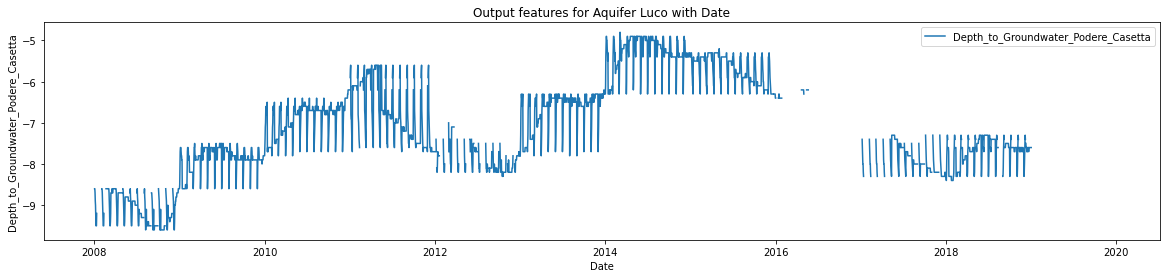

In [49]:
# Plot the depth to groundwater with date for Aquifer Luco
plt.figure(figsize=(20,4))
plt.title('Output features for Aquifer Luco with Date')
line_colors = ['darkblue']
for c,col in enumerate(['Depth_to_Groundwater_Podere_Casetta']):
    sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco[col].replace({np.nan : np.inf}),
                label=col,color=line_colors[c])

**Observations:**
- The Depth to Groundwater was recorded maximum at -9 m in 2008 and later on it reduced sharply till 2011 at -6 m.
- It reduced till an all time low of -5 m in 2014.
- Last records from 2019 show ground water at -8 m.

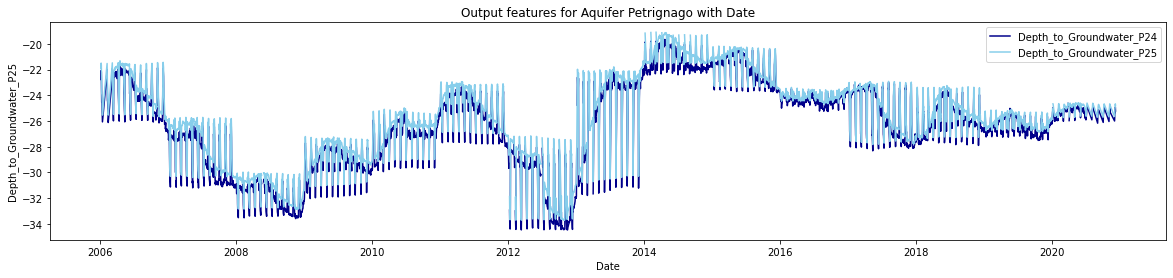

In [51]:
# Plot the depth to groundwater with date for Aquifer Petrignago
plt.figure(figsize=(20,4))
plt.title('Output features for Aquifer Petrignago with Date')
line_colors = ['darkblue','skyblue']
for c,col in enumerate(['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']):
    sns.lineplot(x=pd.to_datetime(aquifer_petrignago['Date']),y=aquifer_petrignago[col].replace({np.nan : np.inf}),
                label=col,color=line_colors[c])

**Observations:**
- The Depth to Groundwater in 2006 was at -24 m in 2006 and recorded around at the same after 2020.
- Maximum depth to groundwater was seen in 2013 upto -34 m.
- Minimum depth to groundwater was seen in 2015 as low as -20 m.

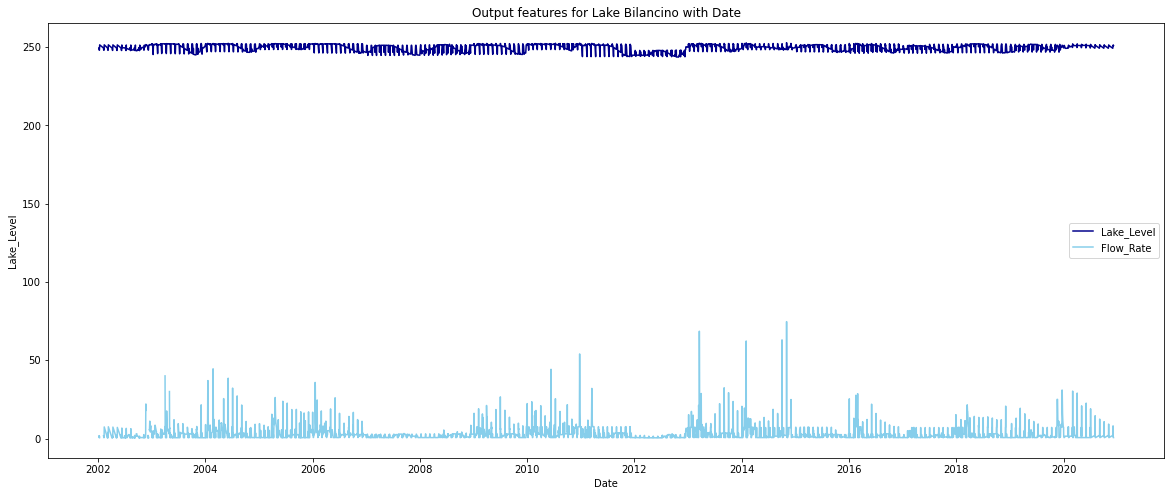

In [7]:
# Plot the depth to groundwater with date for Lake Bilancino 
plt.figure(figsize=(20,8))
plt.title('Output features for Lake Bilancino with Date')
line_colors = ['darkblue','skyblue']
for c,col in enumerate(['Lake_Level','Flow_Rate']):
    sns.lineplot(x=pd.to_datetime(lake_bilancino['Date']),y=lake_bilancino[col].replace({np.nan : np.inf}),
                label=col,color=line_colors[c])

**Observations:**
- The lake level is more or less consistent over the years at 250 m.
- The flow level was found maximum around 2014 at 60 m. It was around 20 m in 2020.

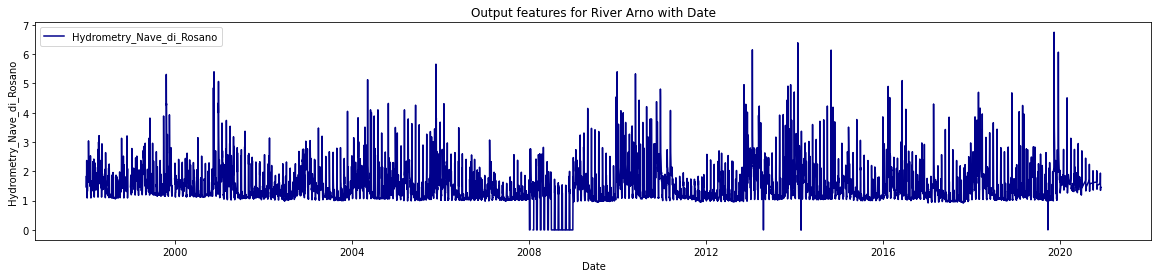

In [8]:
# Plot the depth to groundwater with date for River Arno
plt.figure(figsize=(20,4))
plt.title('Output features for River Arno with Date')
line_colors = ['darkblue']
for c,col in enumerate(['Hydrometry_Nave_di_Rosano']):
    sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno[col].replace({np.nan : np.inf}),
                label=col,color=line_colors[c])

**Observations:**
- Maximum hydrometry was detected by Nave di Rosano in 2020 at 7 m.
- An average of 4 m hydrometry is common to be observed over the years.

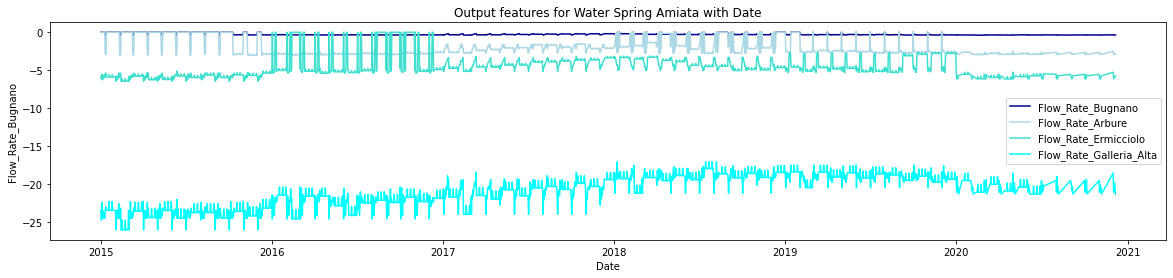

In [9]:
# Plot the depth to groundwater with date for Water Spring Amiata
plt.figure(figsize=(20,4))
plt.title('Output features for Water Spring Amiata with Date')
line_colors = ['darkblue','lightblue','turquoise','aqua']
for c,col in enumerate(['Flow_Rate_Bugnano', 'Flow_Rate_Arbure', 'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']):
    sns.lineplot(x=pd.to_datetime(spring_amiata['Date']),y=spring_amiata[col].replace({np.nan : np.inf}),
                label=col,color=line_colors[c])

**Observations:**
- Flow Rate at Galleria Alta is at -25 l/s in 2015 and decreases upto -20 m in 2020.
- Other springs show consistent flow rates throughout, ranging between 0 to -5 l/s.

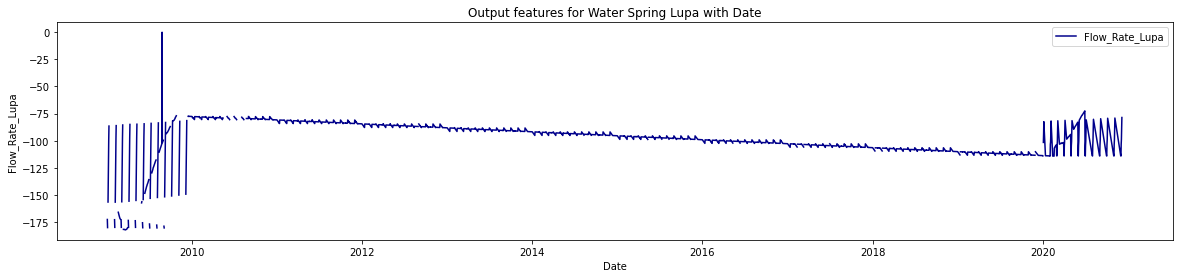

In [10]:
# Plot the depth to groundwater with date for Water spring Lupa
plt.figure(figsize=(20,4))
plt.title('Output features for Water Spring Lupa with Date')
line_colors = ['darkblue']
for c,col in enumerate(['Flow_Rate_Lupa']):
    sns.lineplot(x=pd.to_datetime(spring_lupa['Date']),y=spring_lupa[col].replace({np.nan : np.inf}),
                label=col,color=line_colors[c])

**Observations:**
- Flow rate was around an average of -125 l/s before 2010 but over time it reduced slightly and closed at around -75 l/s in 2020.

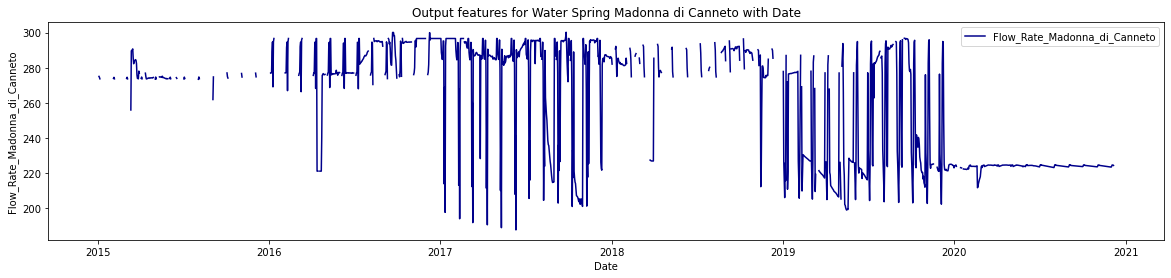

In [11]:
# Plot the depth to groundwater with date for Water Spring Madonna di Canneto
plt.figure(figsize=(20,4))
plt.title('Output features for Water Spring Madonna di Canneto with Date')
line_colors = ['darkblue']
for c,col in enumerate(['Flow_Rate_Madonna_di_Canneto']):
    sns.lineplot(x=pd.to_datetime(spring_madonna['Date']),y=spring_madonna[col].replace({np.nan : np.inf}),
                label=col,color=line_colors[c])

**Observations:**
- In 2015, flow rate was much more stable at 280 l/s.
- In later years like 2017, 2019 flow rate shows a great range of variations from values 200 to 300 l/s.
- In 2020, flow rate for Water Spring Madonna di Canneto was observed at 220 l/s.

Now lets look at the trends of other features like Rainfall and temperature over time.

## Feature analysis with date

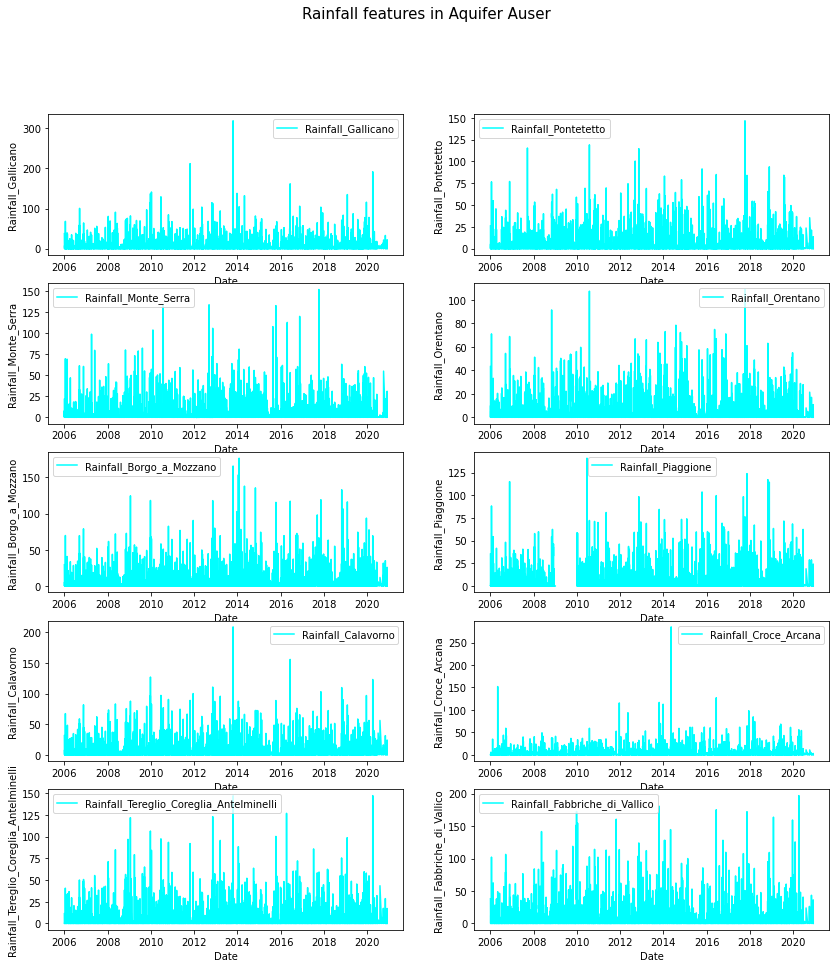

In [12]:
# Create subplots for all rainfall features in Aquifer Auser
fig, axes = plt.subplots(5, 2, figsize = (14,15))
fig.suptitle('Rainfall features in Aquifer Auser',fontsize=15)

#Plot graph for each rainfall feature with date
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Gallicano'].replace({np.nan : np.inf}),
    label='Rainfall_Gallicano',color='aqua',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Pontetetto'].replace({np.nan : np.inf}),
                label='Rainfall_Pontetetto',color='aqua',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Monte_Serra'].replace({np.nan : np.inf}),
    label='Rainfall_Monte_Serra',color='aqua',ax=axes[1][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Orentano'].replace({np.nan : np.inf}),
                label='Rainfall_Orentano',color='aqua',ax=axes[1][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Borgo_a_Mozzano'].replace({np.nan : np.inf}),
    label='Rainfall_Borgo_a_Mozzano',color='aqua',ax=axes[2][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Piaggione'].replace({np.nan : np.inf}),
                label='Rainfall_Piaggione',color='aqua',ax=axes[2][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Calavorno'].replace({np.nan : np.inf}),
    label='Rainfall_Calavorno',color='aqua',ax=axes[3][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Croce_Arcana'].replace({np.nan : np.inf}),
                label='Rainfall_Croce_Arcana',color='aqua',ax=axes[3][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Tereglio_Coreglia_Antelminelli'].replace({np.nan : np.inf}),
    label='Rainfall_Tereglio_Coreglia_Antelminelli',color='aqua',ax=axes[4][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Rainfall_Fabbriche_di_Vallico'].replace({np.nan : np.inf}),
                label='Rainfall_Fabbriche_di_Vallico',color='aqua',ax=axes[4][1])
plt.show()

**Observations:**
- The most rainfall is recieved in the years 2008, 2010, 2014, 2018 and 2020.
- Maximum rainfall is recieved in Pontetetto, Tereglio Coreglia Antelminelli and Fabriche di Vallico area and the least in Orentano.

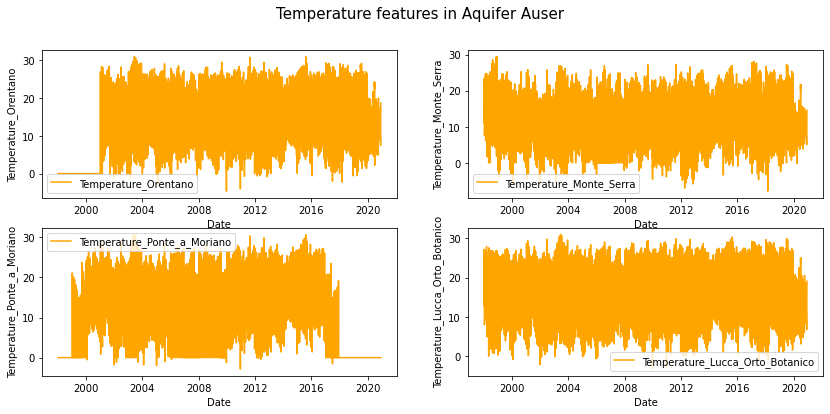

In [13]:
# Create subplots for all temperature features in Aquifer Auser
fig, axes = plt.subplots(2, 2, figsize = (14,6))
fig.suptitle('Temperature features in Aquifer Auser',fontsize=15)

#Plot graph for each temperature feature with date
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Temperature_Orentano'].replace({np.nan : np.inf}),
    label='Temperature_Orentano',color='orange',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Temperature_Monte_Serra'].replace({np.nan : np.inf}),
                label='Temperature_Monte_Serra',color='orange',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Temperature_Ponte_a_Moriano'].replace({np.nan : np.inf}),
    label='Temperature_Ponte_a_Moriano',color='orange',ax=axes[1][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Temperature_Lucca_Orto_Botanico'].replace({np.nan : np.inf}),
                label='Temperature_Lucca_Orto_Botanico',color='orange',ax=axes[1][1])

plt.show()

**Observations:**
- Temperature varies between 0 to 30 degrees for all years.
- Monte Serra has more variations in temperature than other areas.

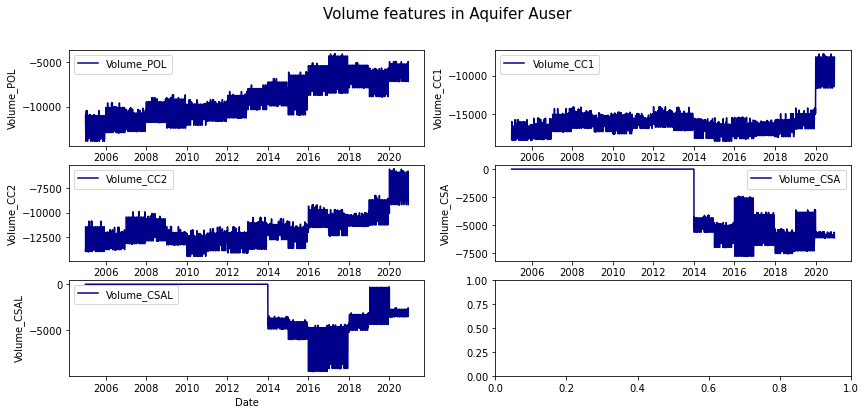

In [52]:
# Create subplots for all temperature features in Aquifer Auser
fig, axes = plt.subplots(3, 2, figsize = (14,6))
fig.suptitle('Volume features in Aquifer Auser',fontsize=15)

#Plot graph for each temperature feature with date
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Volume_POL'].replace({np.nan : np.inf}),
    label='Volume_POL',color='darkblue',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Volume_CC1'].replace({np.nan : np.inf}),
                label='Volume_CC1',color='darkblue',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Volume_CC2'].replace({np.nan : np.inf}),
    label='Volume_CC2',color='darkblue',ax=axes[1][0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Volume_CSA'].replace({np.nan : np.inf}),
                label='Volume_CSA',color='darkblue',ax=axes[1][1])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Volume_CSAL'].replace({np.nan : np.inf}),
                label='Volume_CSAL',color='darkblue',ax=axes[2][0])

plt.show()

**Observations:**
- Volume of water has reduced drastically in POL from -10000 cubic meters in 2006 to -5000 in 2020.
- The year 2020 observes the least volume in most respective areas.
- Volume was maximum in the water treatment plant CC2 till 2016 and reduced greatly after that.

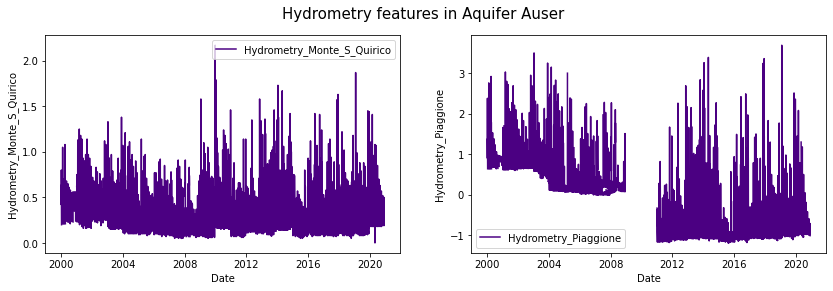

In [15]:
# Create subplots for all hydrometry features in Aquifer Auser
fig, axes = plt.subplots(1, 2, figsize = (14,4))
fig.suptitle('Hydrometry features in Aquifer Auser',fontsize=15)

#Plot graph for each hydrometry features with date
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Hydrometry_Monte_S_Quirico'].replace({np.nan : np.inf}),
    label='Hydrometry_Monte_S_Quirico',color='indigo',ax=axes[0])
sns.lineplot(x=pd.to_datetime(aquifer_auser['Date']),y=aquifer_auser['Hydrometry_Piaggione'].replace({np.nan : np.inf}),
                label='Hydrometry_Piaggione',color='indigo',ax=axes[1])
plt.show()

**Observations:**
- An all time high was recorded for Monte S Quirico hydrometric station in 2010 at 2 m.
- An all time high was recorded for Piaggione hydrometric station in 2020 above 3 m.
- Negative ground water level is also observed for Piaggione for 2012 to 2020 which is not so in case of Monte S Quirico.

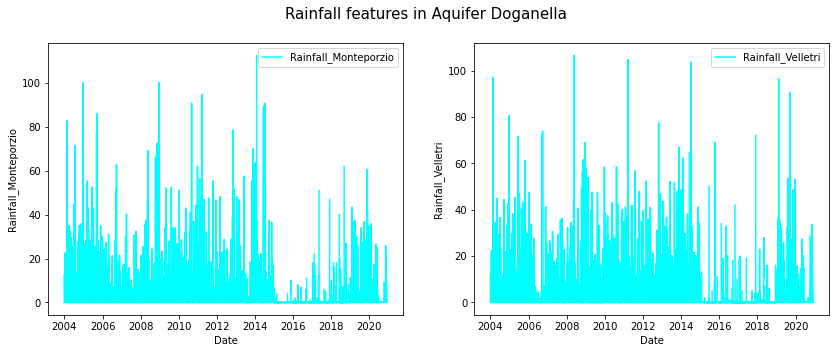

In [16]:
# Aquifer Doganella features
fig, axes = plt.subplots(1, 2, figsize = (14,5))
fig.suptitle('Rainfall features in Aquifer Doganella',fontsize=15)
sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella['Rainfall_Monteporzio'].replace({np.nan : np.inf}),
    label='Rainfall_Monteporzio',color='aqua',ax=axes[0])
sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella['Rainfall_Velletri'].replace({np.nan : np.inf}),
                label='Rainfall_Velletri',color='aqua',ax=axes[1])

plt.show()

**Observations:**
- Low rainfall was recorded for initial 2020.
- Maximum rainfall was above 100 mm in both areas in the years 2014 and 2008 respectively.
- 2016-17 was comparatively scanty for both areas.

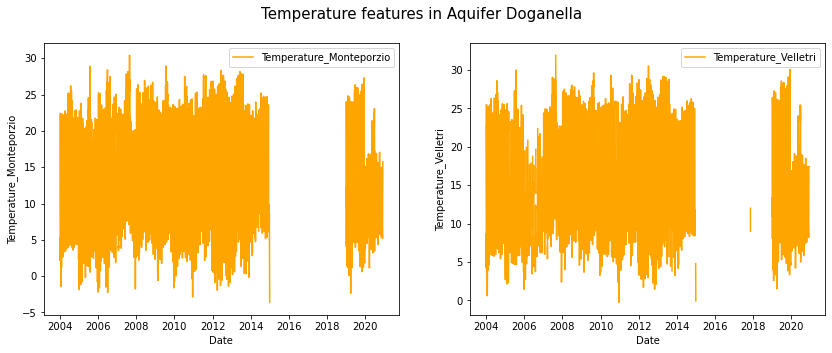

In [17]:
# Aquifer Doganella temperature features
fig, axes = plt.subplots(1, 2, figsize = (14,5))
fig.suptitle('Temperature features in Aquifer Doganella',fontsize=15)
sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella['Temperature_Monteporzio'].replace({np.nan : np.inf}),
    label='Temperature_Monteporzio',color='orange',ax=axes[0])
sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella['Temperature_Velletri'].replace({np.nan : np.inf}),
                label='Temperature_Velletri',color='orange',ax=axes[1])

plt.show()

**Observations:**
- Almost similar maximum temperature throughout the years at 30 degrees.
- Minimum temp in Monteporzio ranging between -5 to 0 and for Velletri a minimum of 0 is observed.
- In Velletri, the temp range for 2007 is between 5 to 20 degrees.

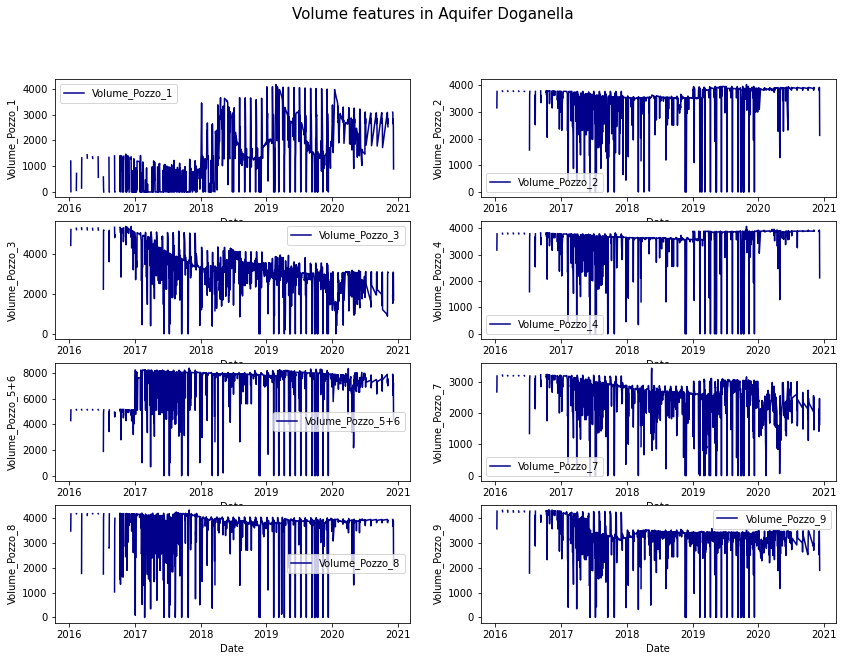

In [18]:
# Aquifer Doganella Volume features
fig, axes = plt.subplots(4, 2, figsize = (14,10))
fig.suptitle('Volume features in Aquifer Doganella',fontsize=15)
sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella['Volume_Pozzo_1'].replace({np.nan : np.inf}),
    label='Volume_Pozzo_1',color='darkblue',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella['Volume_Pozzo_2'].replace({np.nan : np.inf}),
                label='Volume_Pozzo_2',color='darkblue',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella['Volume_Pozzo_3'].replace({np.nan : np.inf}),
    label='Volume_Pozzo_3',color='darkblue',ax=axes[1][0])
sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella['Volume_Pozzo_4'].replace({np.nan : np.inf}),
                label='Volume_Pozzo_4',color='darkblue',ax=axes[1][1])
sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella['Volume_Pozzo_5+6'].replace({np.nan : np.inf}),
                label='Volume_Pozzo_5+6',color='darkblue',ax=axes[2][0])
sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella['Volume_Pozzo_7'].replace({np.nan : np.inf}),
                label='Volume_Pozzo_7',color='darkblue',ax=axes[2][1])
sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella['Volume_Pozzo_8'].replace({np.nan : np.inf}),
    label='Volume_Pozzo_8',color='darkblue',ax=axes[3][0])
sns.lineplot(x=pd.to_datetime(aquifer_doganella['Date']),y=aquifer_doganella['Volume_Pozzo_9'].replace({np.nan : np.inf}),
                label='Volume_Pozzo_9',color='darkblue',ax=axes[3][1])

plt.show()

**Observations:**
- The plant Pozzo 5+6 has maximum volume of all at 8000 cubic meters for most years.
- The plant Pozzo 1 is the only one to show improved volumes from earlier. It closed at around 3000 cm in 2020.
- The plant Pozzo 3, 7 and 9 show decreasing volumes till 2020.

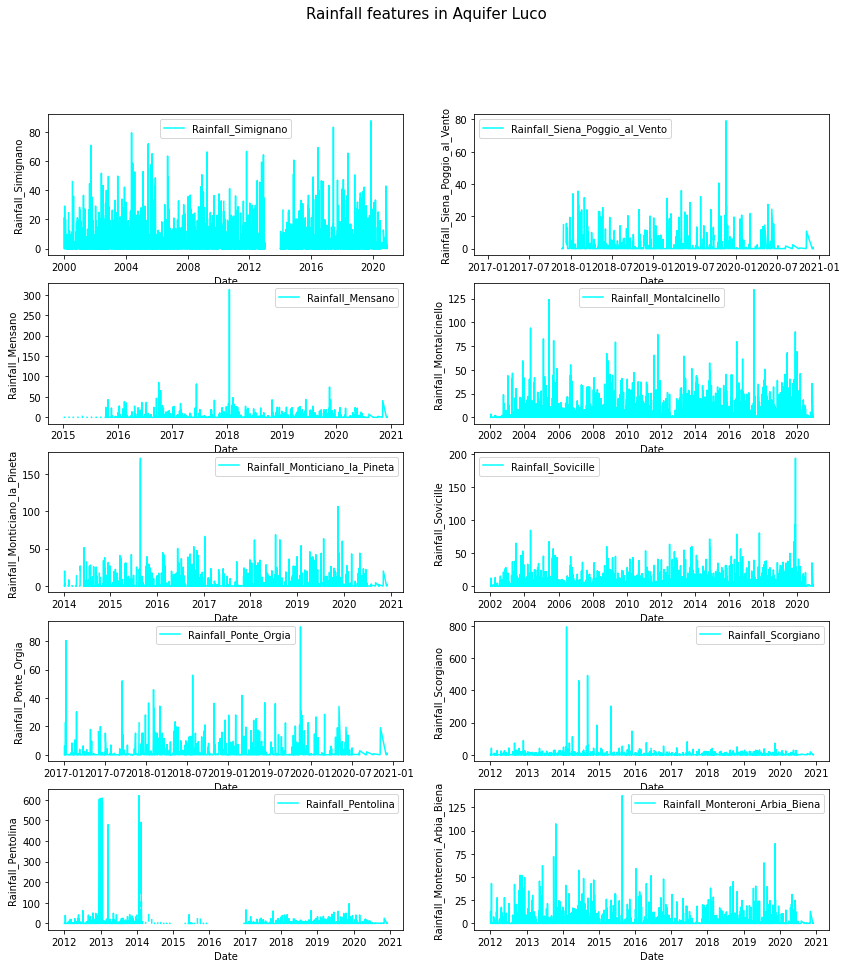

In [19]:
# Aquifer Luco rainfall features
fig, axes = plt.subplots(5, 2, figsize = (14,15))
fig.suptitle('Rainfall features in Aquifer Luco',fontsize=15)

sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Rainfall_Simignano'].replace({np.nan : np.inf}),
    label='Rainfall_Simignano',color='aqua',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Rainfall_Siena_Poggio_al_Vento'].replace({np.nan : np.inf}),
                label='Rainfall_Siena_Poggio_al_Vento',color='aqua',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Rainfall_Mensano'].replace({np.nan : np.inf}),
    label='Rainfall_Mensano',color='aqua',ax=axes[1][0])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Rainfall_Montalcinello'].replace({np.nan : np.inf}),
                label='Rainfall_Montalcinello',color='aqua',ax=axes[1][1])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Rainfall_Monticiano_la_Pineta'].replace({np.nan : np.inf}),
    label='Rainfall_Monticiano_la_Pineta',color='aqua',ax=axes[2][0])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Rainfall_Sovicille'].replace({np.nan : np.inf}),
                label='Rainfall_Sovicille',color='aqua',ax=axes[2][1])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Rainfall_Ponte_Orgia'].replace({np.nan : np.inf}),
    label='Rainfall_Ponte_Orgia',color='aqua',ax=axes[3][0])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Rainfall_Scorgiano'].replace({np.nan : np.inf}),
                label='Rainfall_Scorgiano',color='aqua',ax=axes[3][1])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Rainfall_Pentolina'].replace({np.nan : np.inf}),
    label='Rainfall_Pentolina',color='aqua',ax=axes[4][0])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Rainfall_Monteroni_Arbia_Biena'].replace({np.nan : np.inf}),
                label='Rainfall_Monteroni_Arbia_Biena',color='aqua',ax=axes[4][1])
plt.show()

**Observations:**
-  Less reliable data is available for areas Mensano, Scorgiano and Pentolina as they observe some high ranging outliers.
- Montalcinello and Monteroni_Arbia_Biena recieve abundant rainfall upto 125 mm.

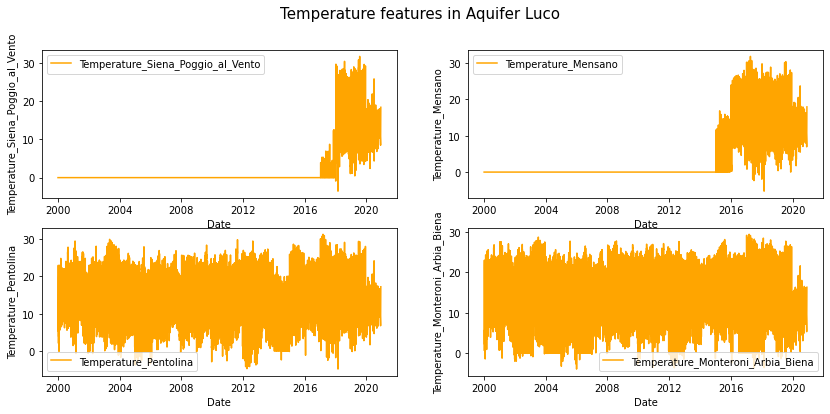

In [21]:
# Temperature features in Aquifer Luco
fig, axes = plt.subplots(2, 2, figsize = (14,6))
fig.suptitle('Temperature features in Aquifer Luco',fontsize=15)
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Temperature_Siena_Poggio_al_Vento'].replace({np.nan : np.inf}),
    label='Temperature_Siena_Poggio_al_Vento',color='orange',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Temperature_Mensano'].replace({np.nan : np.inf}),
                label='Temperature_Mensano',color='orange',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Temperature_Pentolina'].replace({np.nan : np.inf}),
    label='Temperature_Pentolina',color='orange',ax=axes[1][0])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Temperature_Monteroni_Arbia_Biena'].replace({np.nan : np.inf}),
                label='Temperature_Monteroni_Arbia_Biena',color='orange',ax=axes[1][1])

plt.show()

**Observations:**
- Temp ranges between about 0 to 30 degrees in all years all areas.
- Data is available only from 2016 for Sienna Poggo al Vento and Mensano area.

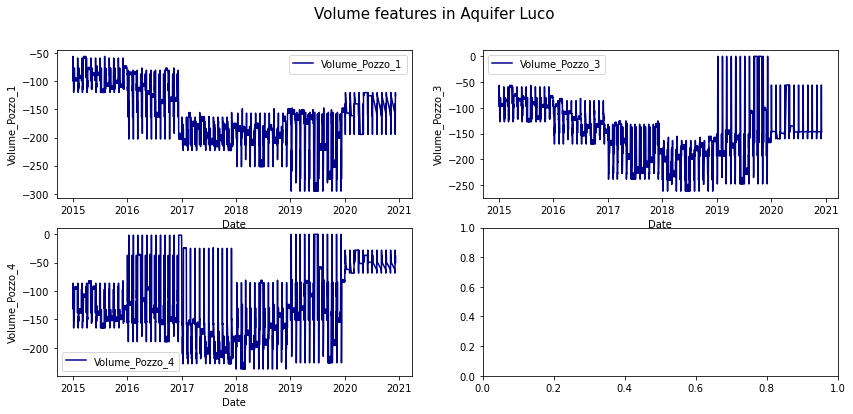

In [22]:
# Volume features in Aquifer Luco
fig, axes = plt.subplots(2, 2, figsize = (14,6))
fig.suptitle('Volume features in Aquifer Luco',fontsize=15)
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Volume_Pozzo_1'].replace({np.nan : np.inf}),
    label='Volume_Pozzo_1',color='darkblue',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Volume_Pozzo_3'].replace({np.nan : np.inf}),
                label='Volume_Pozzo_3',color='darkblue',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(aquifer_luco['Date']),y=aquifer_luco['Volume_Pozzo_4'].replace({np.nan : np.inf}),
    label='Volume_Pozzo_4',color='darkblue',ax=axes[1][0])

plt.show()

**Observations:**
- Volume is deepest at -300 cm in 2019 to 2020 in Pozzo1. In 2020, it dips down to -150 cm.
- Pozzo4 data shows lot of variations and closes at -50 cm for 2020.

<AxesSubplot:title={'center':'Rainfall features in Aquifer Petrignago'}, xlabel='Date', ylabel='Rainfall_Bastia_Umbra'>

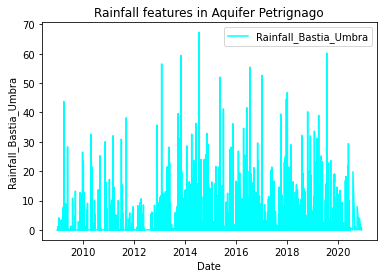

In [23]:
# Rainfall features in Aquifer Petrignago
plt.title('Rainfall features in Aquifer Petrignago')
sns.lineplot(x=pd.to_datetime(aquifer_petrignago['Date']),y=aquifer_petrignago['Rainfall_Bastia_Umbra'].replace({np.nan : np.inf}),
    label='Rainfall_Bastia_Umbra',color='aqua')

**Observations:**
- Highest rainfall was recorded in 2014 at 70 mm and lowest in 2012 at 10 mm.
- Decreasing trend is observed from 2019 till 2020.

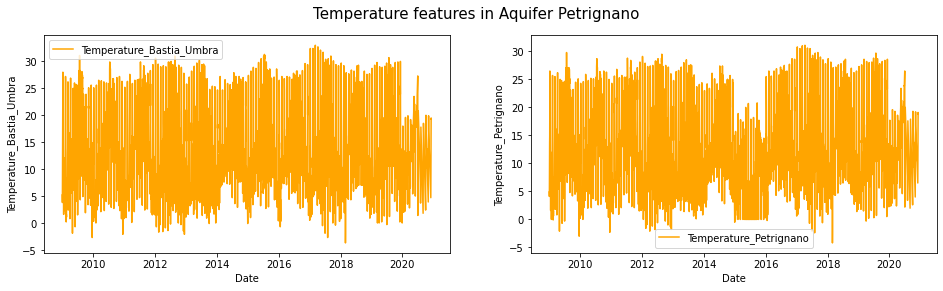

In [24]:
#Temperature features in Aquifer Petrignano
fig, axes = plt.subplots(1, 2, figsize = (16,4))
fig.suptitle('Temperature features in Aquifer Petrignano',fontsize=15)
sns.lineplot(x=pd.to_datetime(aquifer_petrignago['Date']),y=aquifer_petrignago['Temperature_Bastia_Umbra'].replace({np.nan : np.inf}),
    label='Temperature_Bastia_Umbra',color='orange',ax=axes[0])
sns.lineplot(x=pd.to_datetime(aquifer_petrignago['Date']),y=aquifer_petrignago['Temperature_Petrignano'].replace({np.nan : np.inf}),
                label='Temperature_Petrignano',color='orange',ax=axes[1])

plt.show()

**Observations:**
- Temp ranges from -5 to 30 degrees till 2018.
- 2019 to 2020 are comparatively colder from 0 till 25 degrees. Also, 2015 to 2016 have a dip in temperatures in Petrignano.

Text(0.5, 1.0, 'Volume features in Aquifer Petrignago')

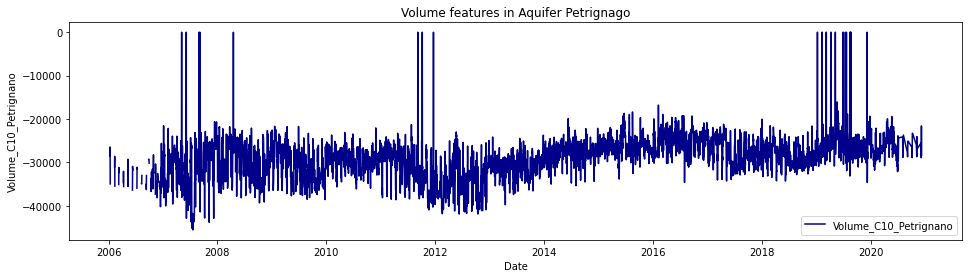

In [25]:
#Volume features in Aquifer Petrignago
plt.figure(figsize=(16,4))
sns.lineplot(x=pd.to_datetime(aquifer_petrignago['Date']),y=aquifer_petrignago['Volume_C10_Petrignano'].replace({np.nan : np.inf}),
    label='Volume_C10_Petrignano',color='darkblue')
plt.title('Volume features in Aquifer Petrignago')

**Observations:**
- Volume is almost consistent over the years in the range of -3000 cubic meters.

Text(0.5, 1.0, 'Hydrometry features in Aquifer Petrignago')

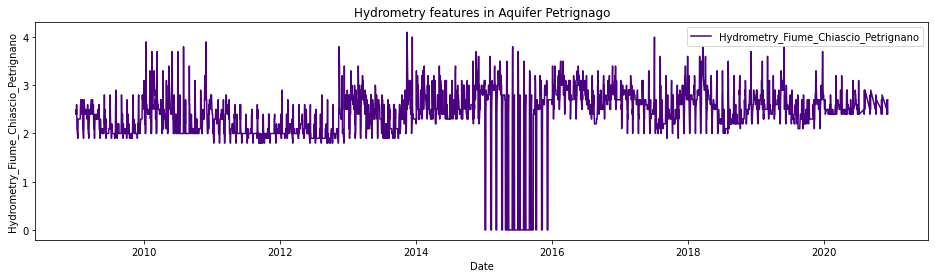

In [26]:
# Hydrometry features in Aquifer Petrignago
plt.figure(figsize=(16,4))
sns.lineplot(x=pd.to_datetime(aquifer_petrignago['Date']),y=aquifer_petrignago['Hydrometry_Fiume_Chiascio_Petrignano'].replace({np.nan : np.inf}),
    label='Hydrometry_Fiume_Chiascio_Petrignano',color='indigo')
plt.title('Hydrometry features in Aquifer Petrignago')

**Observations:**
- A hydrometry of 3 m is observed at Petrignano in 2020.
- All time high ranges upto 4 m occassionally.

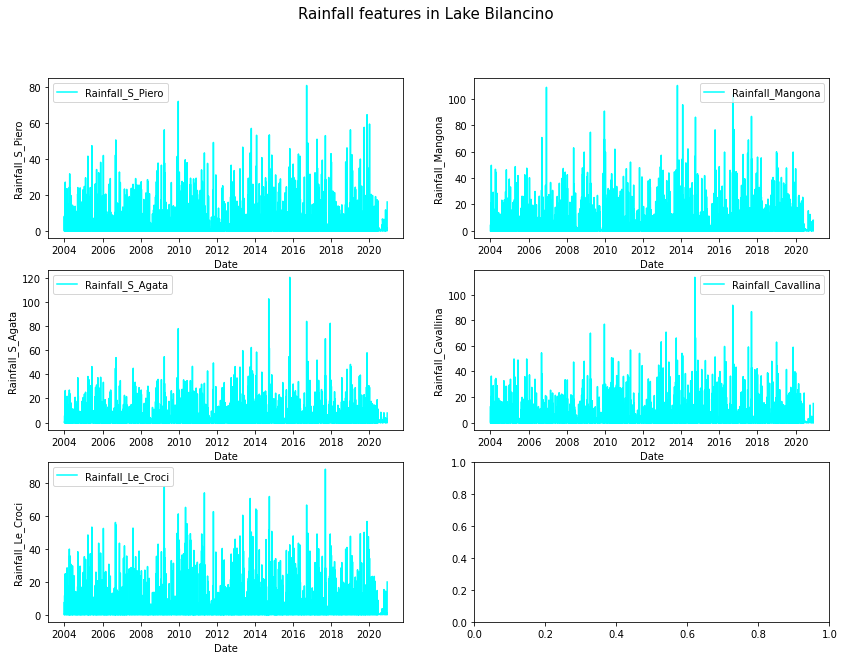

In [27]:
#Rainfall features in Lake Bilancino
fig, axes = plt.subplots(3, 2, figsize = (14,10))
fig.suptitle('Rainfall features in Lake Bilancino',fontsize=15)

sns.lineplot(x=pd.to_datetime(lake_bilancino['Date']),y=lake_bilancino['Rainfall_S_Piero'].replace({np.nan : np.inf}),
    label='Rainfall_S_Piero',color='aqua',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(lake_bilancino['Date']),y=lake_bilancino['Rainfall_Mangona'].replace({np.nan : np.inf}),
                label='Rainfall_Mangona',color='aqua',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(lake_bilancino['Date']),y=lake_bilancino['Rainfall_S_Agata'].replace({np.nan : np.inf}),
    label='Rainfall_S_Agata',color='aqua',ax=axes[1][0])
sns.lineplot(x=pd.to_datetime(lake_bilancino['Date']),y=lake_bilancino['Rainfall_Cavallina'].replace({np.nan : np.inf}),
                label='Rainfall_Cavallina',color='aqua',ax=axes[1][1])
sns.lineplot(x=pd.to_datetime(lake_bilancino['Date']),y=lake_bilancino['Rainfall_Le_Croci'].replace({np.nan : np.inf}),
    label='Rainfall_Le_Croci',color='aqua',ax=axes[2][0])

plt.show()

**Observations:**
- The Agata area recieves the maximum rainfall of all, upto 120 mm.
- The rainfall recieved throughout a year ranges from 20 to 80 mm on an average.

Text(0.5, 1.0, 'Temperature features in Lake Bilancino')

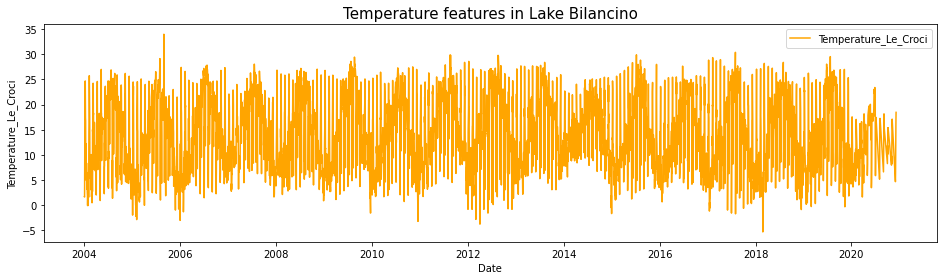

In [28]:
# Temperature features in Lake Bilancino
plt.figure(figsize=(16,4))
sns.lineplot(x=pd.to_datetime(lake_bilancino['Date']),y=lake_bilancino['Temperature_Le_Croci'].replace({np.nan : np.inf}),
    label='Temperature_Le_Croci',color='orange')
plt.title('Temperature features in Lake Bilancino',fontsize=15)

**Observations:**
- The temperature ranges from -5 to 25 degrees.
- The 2020 temperature lies between 5 to 15 degrees.

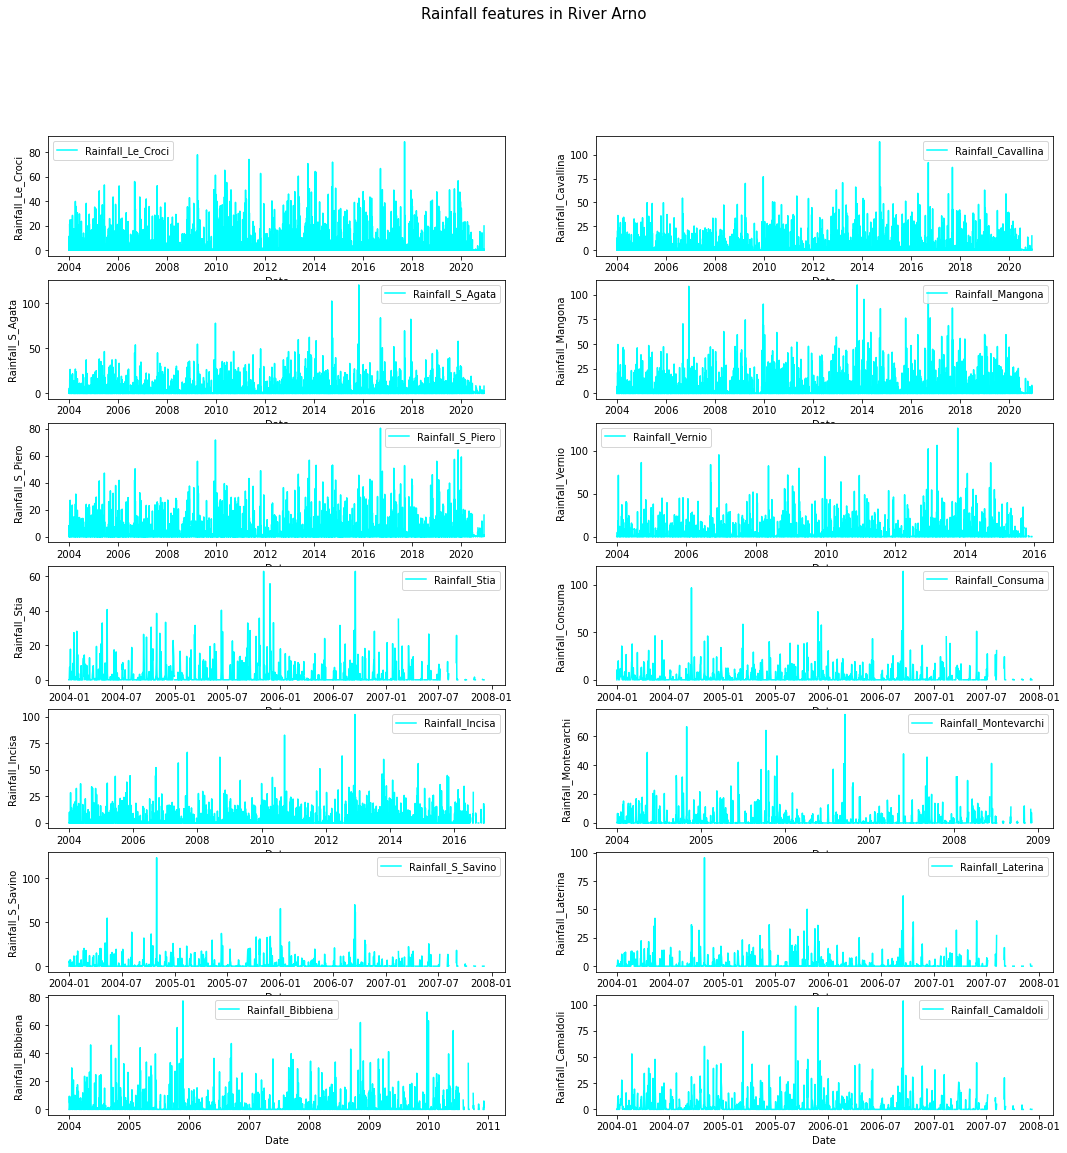

In [29]:
# Rainfall features in River Arno
fig, axes = plt.subplots(7, 2, figsize = (18,18))
fig.suptitle('Rainfall features in River Arno',fontsize=15)


# Plot graph for rainfall features
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_Le_Croci'].replace({np.nan : np.inf}),
    label='Rainfall_Le_Croci',color='aqua',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_Cavallina'].replace({np.nan : np.inf}),
                label='Rainfall_Cavallina',color='aqua',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_S_Agata'].replace({np.nan : np.inf}),
    label='Rainfall_S_Agata',color='aqua',ax=axes[1][0])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_Mangona'].replace({np.nan : np.inf}),
                label='Rainfall_Mangona',color='aqua',ax=axes[1][1])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_S_Piero'].replace({np.nan : np.inf}),
    label='Rainfall_S_Piero',color='aqua',ax=axes[2][0])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_Vernio'].replace({np.nan : np.inf}),
                label='Rainfall_Vernio',color='aqua',ax=axes[2][1])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_Stia'].replace({np.nan : np.inf}),
    label='Rainfall_Stia',color='aqua',ax=axes[3][0])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_Consuma'].replace({np.nan : np.inf}),
                label='Rainfall_Consuma',color='aqua',ax=axes[3][1])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_Incisa'].replace({np.nan : np.inf}),
    label='Rainfall_Incisa',color='aqua',ax=axes[4][0])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_Montevarchi'].replace({np.nan : np.inf}),
                label='Rainfall_Montevarchi',color='aqua',ax=axes[4][1])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_S_Savino'].replace({np.nan : np.inf}),
    label='Rainfall_S_Savino',color='aqua',ax=axes[5][0])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_Laterina'].replace({np.nan : np.inf}),
                label='Rainfall_Laterina',color='aqua',ax=axes[5][1])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_Bibbiena'].replace({np.nan : np.inf}),
    label='Rainfall_Bibbiena',color='aqua',ax=axes[6][0])
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Rainfall_Camaldoli'].replace({np.nan : np.inf}),
                label='Rainfall_Camaldoli',color='aqua',ax=axes[6][1])
plt.show()

**Observations:**
- Rainfall ranges between 0 to 100 mm.
- The 2020 rainfall seems going up to 10 mm. 
- Data is missing after 2008 or 2016 for many areas

Text(0.5, 1.0, 'Temperature features in River Arno')

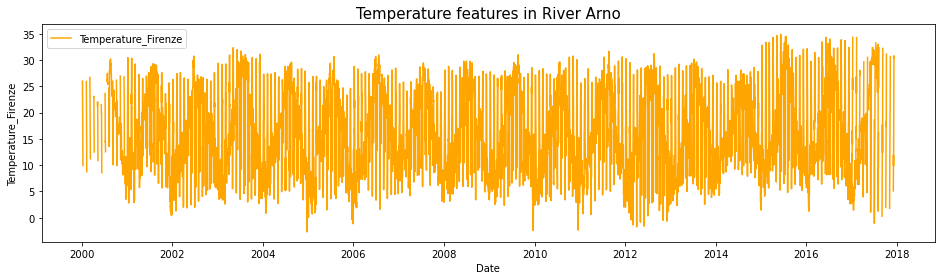

In [30]:
#Temperature features in River Arno
plt.figure(figsize=(16,4))
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Temperature_Firenze'].replace({np.nan : np.inf}),
    label='Temperature_Firenze',color='orange')
plt.title('Temperature features in River Arno',fontsize=15)

**Observations:**
- Temp lies between 0 to 35 degrees.
- Data is available only upto 2018.

Text(0.5, 1.0, 'Hydrometry features in Lake Arno')

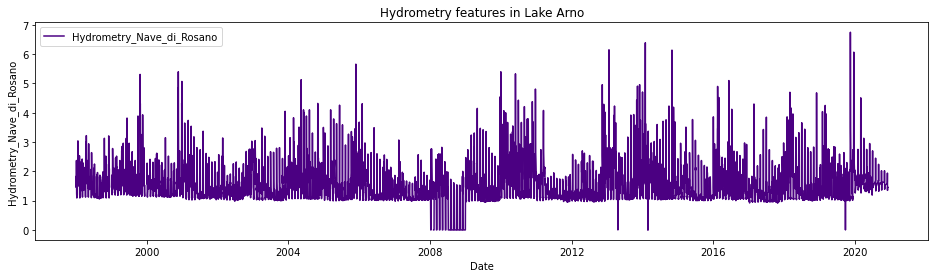

In [31]:
# Hydrometry features in Lake Arno
plt.figure(figsize=(16,4))
sns.lineplot(x=pd.to_datetime(river_arno['Date']),y=river_arno['Hydrometry_Nave_di_Rosano'].replace({np.nan : np.inf}),
    label='Hydrometry_Nave_di_Rosano',color='indigo')
plt.title('Hydrometry features in Lake Arno')

**Observations:**
- Hydrometry reaches a maximum of 7 m in 2020.
- Year 2013 saw a lot of variations in both upward and downward direction in hydrometry.

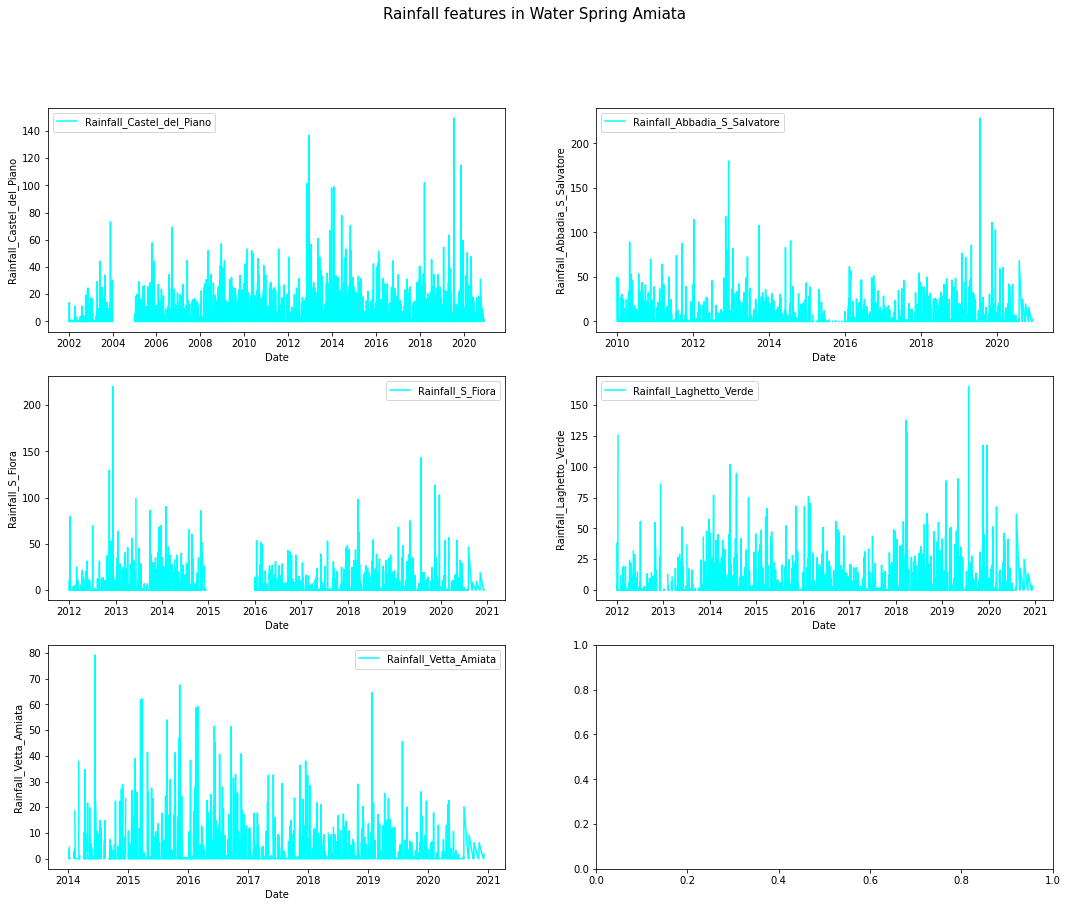

In [32]:
#Rainfall features in Water Spring Amiata
fig, axes = plt.subplots(3, 2, figsize = (18,14))
fig.suptitle('Rainfall features in Water Spring Amiata',fontsize=15)

sns.lineplot(x=pd.to_datetime(spring_amiata['Date']),y=spring_amiata['Rainfall_Castel_del_Piano'].replace({np.nan : np.inf}),
    label='Rainfall_Castel_del_Piano',color='aqua',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(spring_amiata['Date']),y=spring_amiata['Rainfall_Abbadia_S_Salvatore'].replace({np.nan : np.inf}),
                label='Rainfall_Abbadia_S_Salvatore',color='aqua',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(spring_amiata['Date']),y=spring_amiata['Rainfall_S_Fiora'].replace({np.nan : np.inf}),
    label='Rainfall_S_Fiora',color='aqua',ax=axes[1][0])
sns.lineplot(x=pd.to_datetime(spring_amiata['Date']),y=spring_amiata['Rainfall_Laghetto_Verde'].replace({np.nan : np.inf}),
                label='Rainfall_Laghetto_Verde',color='aqua',ax=axes[1][1])
sns.lineplot(x=pd.to_datetime(spring_amiata['Date']),y=spring_amiata['Rainfall_Vetta_Amiata'].replace({np.nan : np.inf}),
    label='Rainfall_Vetta_Amiata',color='aqua',ax=axes[2][0])

plt.show()

**Observations:**
- The rainfall in any area reaches up to a maximum of 150 mm.
- The 2020-2021 phase observes a low rainfall with only about 50 mm.

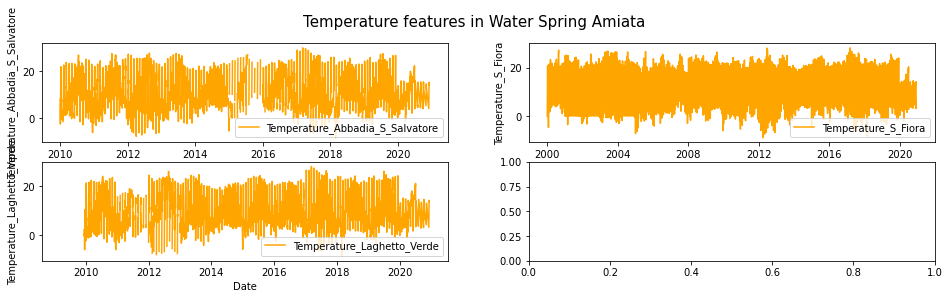

In [33]:
#Temperature features in Water Spring Amiata
fig, axes = plt.subplots(2, 2, figsize = (16,4))
fig.suptitle('Temperature features in Water Spring Amiata',fontsize=15)

# Plot graphs between temp and date feature
sns.lineplot(x=pd.to_datetime(spring_amiata['Date']),y=spring_amiata['Temperature_Abbadia_S_Salvatore'].replace({np.nan : np.inf}),
    label='Temperature_Abbadia_S_Salvatore',color='orange',ax=axes[0][0])
sns.lineplot(x=pd.to_datetime(spring_amiata['Date']),y=spring_amiata['Temperature_S_Fiora'].replace({np.nan : np.inf}),
                label='Temperature_S_Fiora',color='orange',ax=axes[0][1])
sns.lineplot(x=pd.to_datetime(spring_amiata['Date']),y=spring_amiata['Temperature_Laghetto_Verde'].replace({np.nan : np.inf}),
                label='Temperature_Laghetto_Verde',color='orange',ax=axes[1][0])

plt.show()

**Observations:**
- The temp ranges from -10 to 30 degrees.
- There is a lot of variation in temp in the year 2012.
- For initial 2020, a range of 0 to 10 degrees was recorded.

Text(0.5, 1.0, 'Rainfall features in Water Spring Lupa')

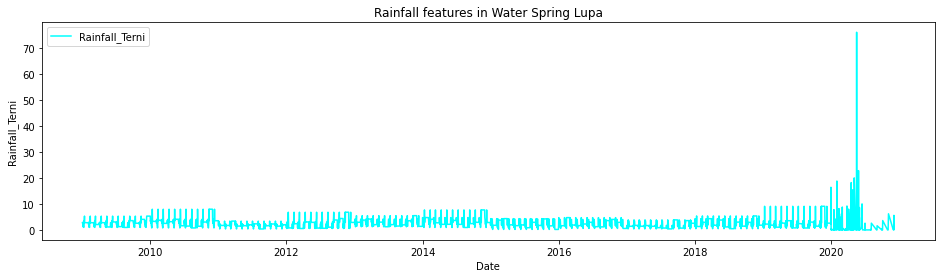

In [34]:
#Rainfall features in Water Spring Lupa
plt.figure(figsize=(16,4))
sns.lineplot(x=pd.to_datetime(spring_lupa['Date']),y=spring_lupa['Rainfall_Terni'].replace({np.nan : np.inf}),
    label='Rainfall_Terni',color='aqua')
plt.title('Rainfall features in Water Spring Lupa')

**Observations:**
- The rainfall is usually from 0 to 10 mm for most of the years.
- But it improves around the starting of the year 2020. A maximum is recorded upto 80 mm in 2020.

Text(0.5, 1.0, 'Rainfall features in Water Spring Madonna')

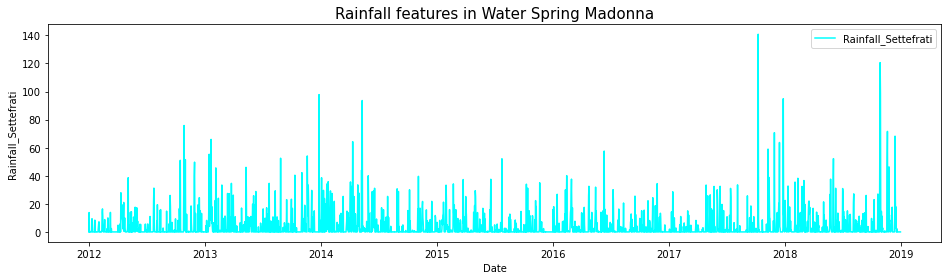

In [35]:
#Rainfall features in Water Spring Madonna
plt.figure(figsize=(16,4))
sns.lineplot(x=pd.to_datetime(spring_madonna['Date']),y=spring_madonna['Rainfall_Settefrati'].replace({np.nan : np.inf}),
    label='Rainfall_Settefrati',color='aqua')
plt.title('Rainfall features in Water Spring Madonna',fontsize=15)

**Observations:**
- Maximum rainfall is 140 mm in around 2018.
- Latest available year data is for 2019 with high rainfall at 120 mm.

Text(0.5, 1.0, 'Temperature features in Water Spring Madonna')

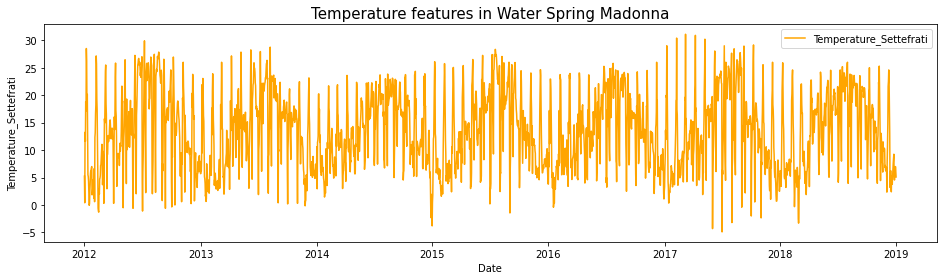

In [58]:
plt.figure(figsize=(16,4))
sns.lineplot(x=pd.to_datetime(spring_madonna['Date']),y=spring_madonna['Temperature_Settefrati'].replace({np.nan : np.inf}),
    label='Temperature_Settefrati',color='orange')
plt.title('Temperature features in Water Spring Madonna',fontsize=15)

## Average yearly and monthly comparison of all features with target features

In [55]:
# Aquifer Auser

#copy the original dataset into a new variable
aquifer_auser_yearly = aquifer_auser.copy()

# extract years from the Date column and store as a new column
aquifer_auser_yearly['Year'] = pd.to_datetime(aquifer_auser_yearly['Date']).dt.year.values

# take the mean of groups of yearly values
aquifer_auser_yearly = aquifer_auser_yearly.groupby('Year').mean()

#take mean of rainfall features per year
aquifer_auser_yearly['mean_rainfall'] = aquifer_auser_yearly[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico']].mean(axis=1)

#take mean of temperature features per year
aquifer_auser_yearly['mean_temp'] = aquifer_auser_yearly[['Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico']].mean(axis=1)

#take mean of volume features per year
aquifer_auser_yearly['mean_volume'] = aquifer_auser_yearly[['Volume_POL', 'Volume_CC1', 'Volume_CC2',
                                                            'Volume_CSA', 'Volume_CSAL']].mean(axis=1)

#take mean of hydrometry features per year
aquifer_auser_yearly['mean_hydrometry'] = aquifer_auser_yearly[['Hydrometry_Monte_S_Quirico', 
                                                                'Hydrometry_Piaggione']].mean(axis=1)

#take mean of depth to groundwater features per year
aquifer_auser_yearly['mean_depth_gwater'] = aquifer_auser_yearly[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']].mean(axis=1)

# reset the index to get the year as a column
aquifer_auser_yearly = aquifer_auser_yearly.reset_index()


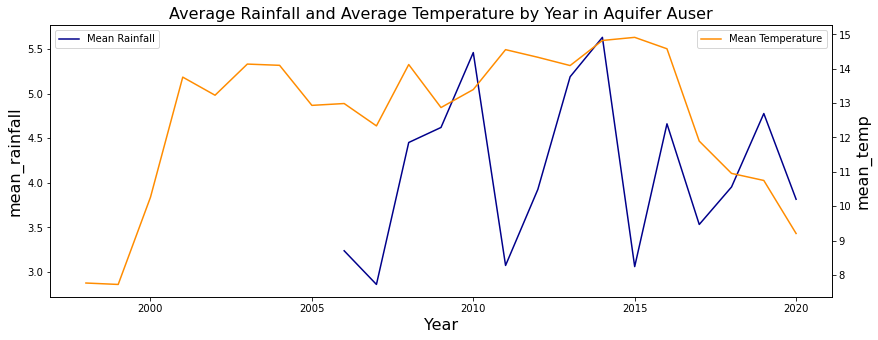

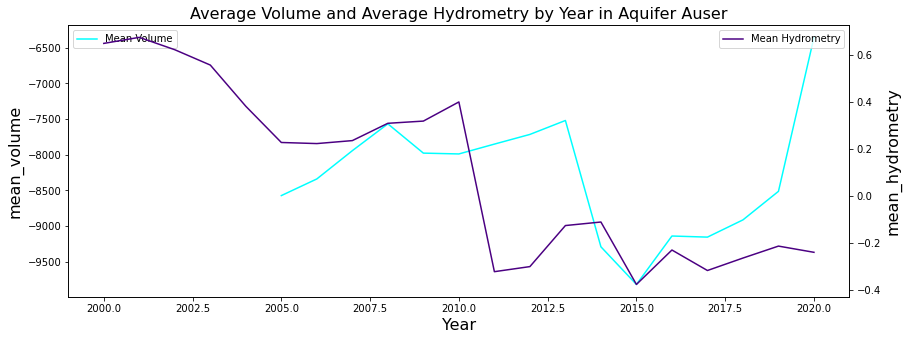

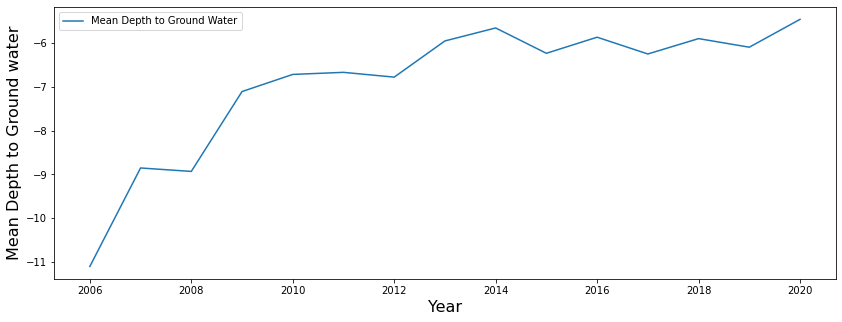

In [57]:
# Plot the rainfall, temperature graph

fig, ax1 = plt.subplots(figsize=(14,5))

#line plot with dual y axis for rainfall, temperature and x axis for year
ax1.set_title('Average Rainfall and Average Temperature by Year in Aquifer Auser', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_rainfall', data = aquifer_auser_yearly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_temp', data = aquifer_auser_yearly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()


# Plot the volume, hydrometry graph
fig, ax1 = plt.subplots(figsize=(14,5))
#line plot with dual y axis for volume, hydrometry and x axis for year
ax1.set_title('Average Volume and Average Hydrometry by Year in Aquifer Auser', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Volume', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_volume', data = aquifer_auser_yearly, color='aqua',label='Mean Volume')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')


ax2 = ax1.twinx()
#line plot 
ax2.set_ylabel('Mean Hydrometry', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_hydrometry', data = aquifer_auser_yearly, color='indigo',label='Mean Hydrometry')
ax2.tick_params(axis='both')
plt.legend()
plt.show()


# Plot the depth to ground water as separate graph
plt.figure(figsize=(14,5))
sns.lineplot(x='Year', y='mean_depth_gwater', data = aquifer_auser_yearly,label='Mean Depth to Ground Water')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mean Depth to Ground water', fontsize=16)
plt.legend()
plt.show()

**Observations:**
- The mean depth to ground water per year keeps on dipping at drops to an average of -6 mm into 2020. This happens when mean rainfall and temp are 4 mm and 9 degree respectively, which are moderate as compared to other years means. Also mean volume and mean hydrometry is -6500 cm and -0.2 m in 2020 which is very low.

In [39]:
# Aquifer Auser monthly

#copy the original dataset into a new variable
aquifer_auser_monthly = aquifer_auser.copy()

# extract month from the Date column and store as a new column
aquifer_auser_monthly['Month'] = pd.to_datetime(aquifer_auser_monthly['Date']).dt.month.values

# take the mean of groups of monthly values
aquifer_auser_monthly = aquifer_auser_monthly.groupby('Month').mean()

#take mean of rainfall features per month
aquifer_auser_monthly['mean_rainfall'] = aquifer_auser_monthly[['Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico']].mean(axis=1)

#take mean of temperature features per month
aquifer_auser_monthly['mean_temp'] = aquifer_auser_monthly[['Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',]].mean(axis=1)
aquifer_auser_monthly['mean_volume'] = aquifer_auser_monthly[['Volume_POL', 'Volume_CC1', 'Volume_CC2',
                                                            'Volume_CSA', 'Volume_CSAL']].mean(axis=1)

#take mean of hydrometry features per month
aquifer_auser_monthly['mean_hydrometry'] = aquifer_auser_monthly[['Hydrometry_Monte_S_Quirico', 
                                                                'Hydrometry_Piaggione']].mean(axis=1)

#take mean of depth to groundwater features per month
aquifer_auser_monthly['mean_depth_gwater'] = aquifer_auser_monthly[['Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']].mean(axis=1)

# reset the index to get the month as a column
aquifer_auser_monthly = aquifer_auser_monthly.reset_index()


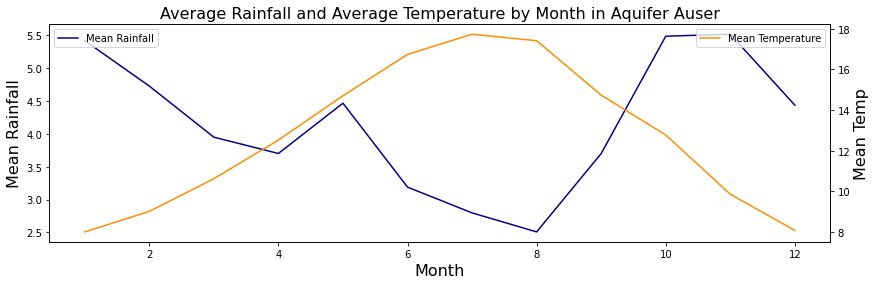

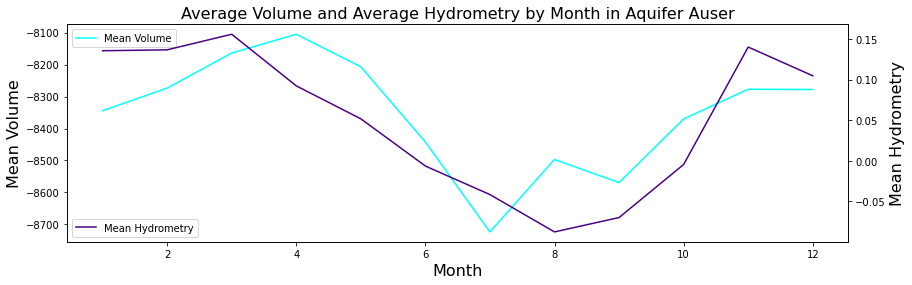

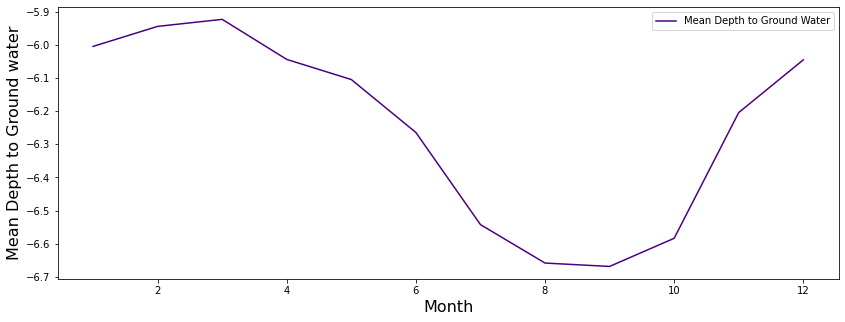

In [40]:
# Plot the rainfall, temperature graph
fig, ax1 = plt.subplots(figsize=(14,4))

#line plot with dual y axis for rainfall, temperature and x axis for month
ax1.set_title('Average Rainfall and Average Temperature by Month in Aquifer Auser', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_rainfall', data = aquifer_auser_monthly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_temp', data = aquifer_auser_monthly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()


# Plot the volume, hydrometry graph
fig, ax1 = plt.subplots(figsize=(14,4))

#line plot with dual y axis for volume, hydrometry and x axis for year
ax1.set_title('Average Volume and Average Hydrometry by Month in Aquifer Auser', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Volume', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_volume', data = aquifer_auser_monthly, color='aqua',label='Mean Volume')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')


ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Hydrometry', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_hydrometry', data = aquifer_auser_monthly, color='indigo',label='Mean Hydrometry')
ax2.tick_params(axis='both')
plt.legend()
plt.show()

# Plot the depth to ground water as separate graph
plt.figure(figsize=(14,5))
sns.lineplot(x='Month', y='mean_depth_gwater', data = aquifer_auser_monthly, color='indigo',label='Mean Depth to Ground Water')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Mean Depth to Ground water', fontsize=16)
plt.legend()
plt.show()


**Observations:**
- The maximum average rainfall is recorded in the month of october or november on an average. The maximum temperature is found in July or August. The mean volume is also highest at -8700 cm and mean hydrometry at -0.10 m in July and august. This is around the same time the average depth to groundwater is found at maximum at -6.7 m.

In [41]:
# Aquifer Doganella yearly

#copy the original dataset into a new variable
aquifer_doganella_yearly = aquifer_doganella.copy()

# extract years from the Date column and store as a new column
aquifer_doganella_yearly['Year'] = pd.to_datetime(aquifer_doganella_yearly['Date']).dt.year.values

# take the mean of groups of yearly values
aquifer_doganella_yearly = aquifer_doganella_yearly.groupby('Year').mean()

#take mean of rainfall features per year
aquifer_doganella_yearly['mean_rainfall'] = aquifer_doganella_yearly[['Rainfall_Monteporzio', 'Rainfall_Velletri']].mean(axis=1)

#take mean of temperature features per year
aquifer_doganella_yearly['mean_temp'] = aquifer_doganella_yearly[['Temperature_Monteporzio', 'Temperature_Velletri']].mean(axis=1)

#take mean of volume features per year
aquifer_doganella_yearly['mean_volume'] = aquifer_doganella_yearly[['Volume_Pozzo_3', 'Volume_Pozzo_4', 'Volume_Pozzo_5+6',
       'Volume_Pozzo_7', 'Volume_Pozzo_8', 'Volume_Pozzo_9']].mean(axis=1)

#take mean of depth to groundwater features per year
aquifer_doganella_yearly['mean_depth_gwater'] = aquifer_doganella_yearly[['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6',
       'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
       'Depth_to_Groundwater_Pozzo_9']].mean(axis=1)

# reset the index to get the year as a column
aquifer_doganella_yearly = aquifer_doganella_yearly.reset_index()


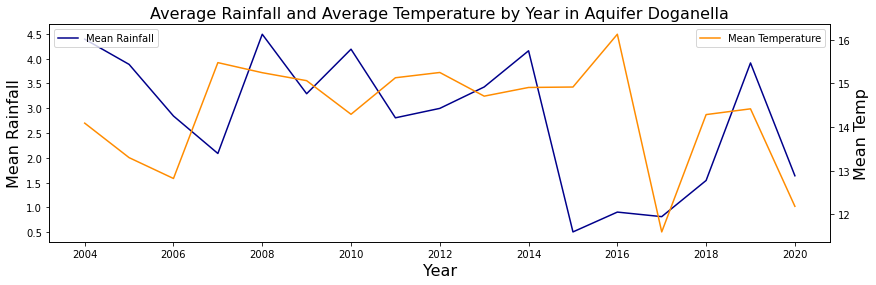

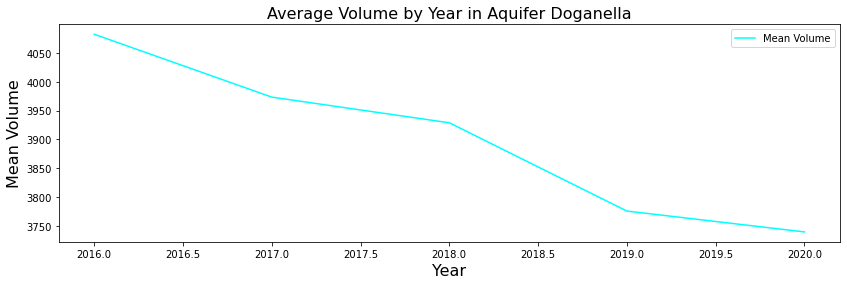

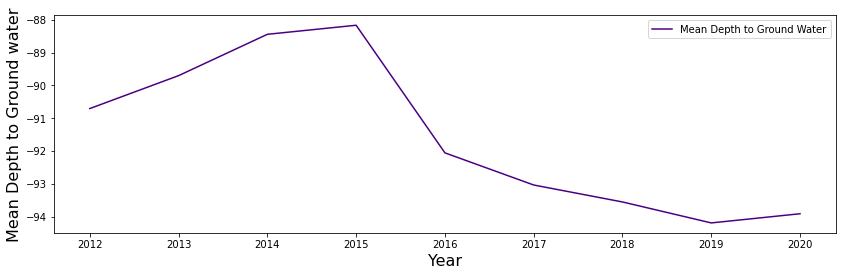

In [42]:
# Plot the rainfall, temperature graph
fig, ax1 = plt.subplots(figsize=(14,4))

#line plot with dual y axis for rainfall, temperature and x axis for year
ax1.set_title('Average Rainfall and Average Temperature by Year in Aquifer Doganella', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_rainfall', data = aquifer_doganella_yearly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_temp', data = aquifer_doganella_yearly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()


# Plot the volume graph
fig, ax1 = plt.subplots(figsize=(14,4))
#line plot 
ax1.set_title('Average Volume by Year in Aquifer Doganella', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Volume', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_volume', data = aquifer_doganella_yearly, color='aqua',label='Mean Volume')
ax1.tick_params(axis='both')
plt.legend()

# Plot the depth to ground water as separate graph
plt.figure(figsize=(14,4))
sns.lineplot(x='Year', y='mean_depth_gwater', data = aquifer_doganella_yearly, color='indigo',label='Mean Depth to Ground Water')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mean Depth to Ground water', fontsize=16)
plt.legend()
plt.show()


**Observations:**
- Mean Temperature and Rainfall are quite high for 2019. Mean Volume is about the lowest in 2019. So the average depth to ground water is quite deep at -94 m in 2019 to 2020.

In [43]:
# Aquifer Doganella

#copy the original dataset into a new variable
aquifer_doganella_monthly = aquifer_doganella.copy()

# extract months from the Date column and store as a new column
aquifer_doganella_monthly['Month'] = pd.to_datetime(aquifer_doganella_monthly['Date']).dt.month.values

# take the mean of groups of monthly values
aquifer_doganella_monthly = aquifer_doganella_monthly.groupby('Month').mean()

#take mean of rainfall features per month
aquifer_doganella_monthly['mean_rainfall'] = aquifer_doganella_monthly[['Rainfall_Monteporzio', 'Rainfall_Velletri']].mean(axis=1)

#take mean of temperature features per month
aquifer_doganella_monthly['mean_temp'] = aquifer_doganella_monthly[['Temperature_Monteporzio', 'Temperature_Velletri']].mean(axis=1)

#take mean of volume features per month
aquifer_doganella_monthly['mean_volume'] = aquifer_doganella_monthly[['Volume_Pozzo_3', 'Volume_Pozzo_4', 'Volume_Pozzo_5+6',
       'Volume_Pozzo_7', 'Volume_Pozzo_8', 'Volume_Pozzo_9']].mean(axis=1)


#take mean of depth to groundwater features per month
aquifer_doganella_monthly['mean_depth_gwater'] = aquifer_doganella_monthly[['Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_2',
       'Depth_to_Groundwater_Pozzo_3', 'Depth_to_Groundwater_Pozzo_4',
       'Depth_to_Groundwater_Pozzo_5', 'Depth_to_Groundwater_Pozzo_6',
       'Depth_to_Groundwater_Pozzo_7', 'Depth_to_Groundwater_Pozzo_8',
       'Depth_to_Groundwater_Pozzo_9']].mean(axis=1)

# reset the index to get the year as a column
aquifer_doganella_monthly = aquifer_doganella_monthly.reset_index()


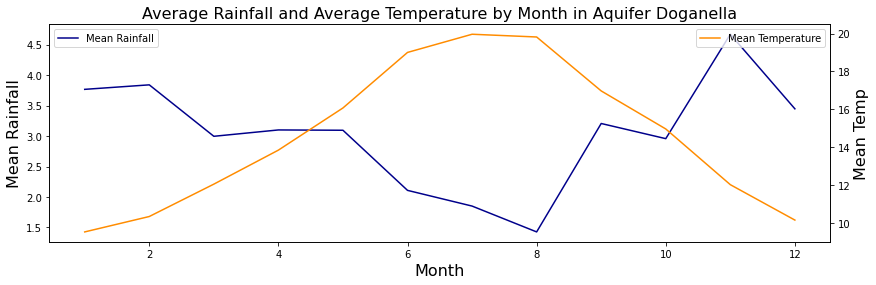

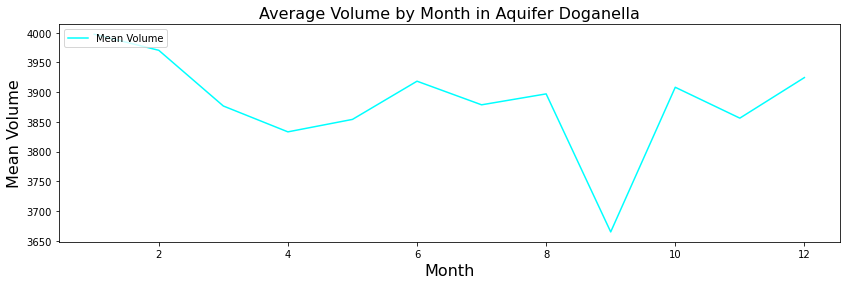

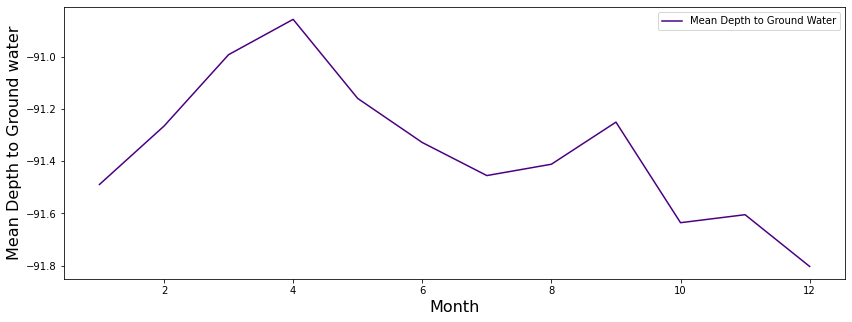

In [44]:
# Plot the rainfall, temperature graph
fig, ax1 = plt.subplots(figsize=(14,4))

#line plot with dual y axis for rainfall, temperature and x axis for month
ax1.set_title('Average Rainfall and Average Temperature by Month in Aquifer Doganella', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_rainfall', data = aquifer_doganella_monthly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_temp', data = aquifer_doganella_monthly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()


# Plot the volume graph
fig, ax1 = plt.subplots(figsize=(14,4))

#line plot with volume for month
ax1.set_title('Average Volume by Month in Aquifer Doganella', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Volume', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_volume', data = aquifer_doganella_monthly, color='aqua',label='Mean Volume')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')
plt.show()

# Plot the depth to ground water as separate graph
plt.figure(figsize=(14,5))
sns.lineplot(x='Month', y='mean_depth_gwater', data = aquifer_doganella_monthly, color='indigo',label='Mean Depth to Ground Water')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Mean Depth to Ground water', fontsize=16)
plt.legend()
plt.show()


**Observations:**
- Mean volume is quite high in months when mean rainfall is high and mean temp is low. Hence mean depth to ground water is also quite deep in these months like January, July and August.

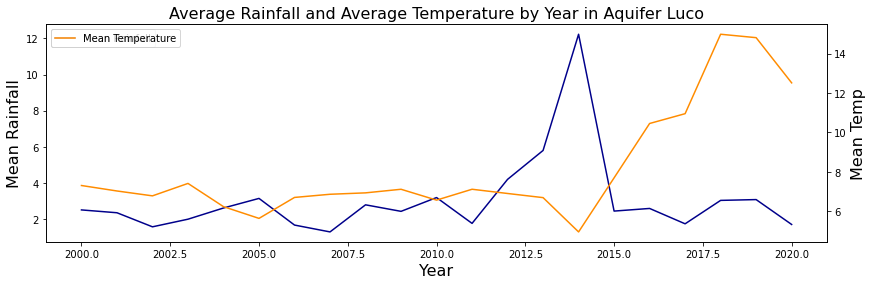

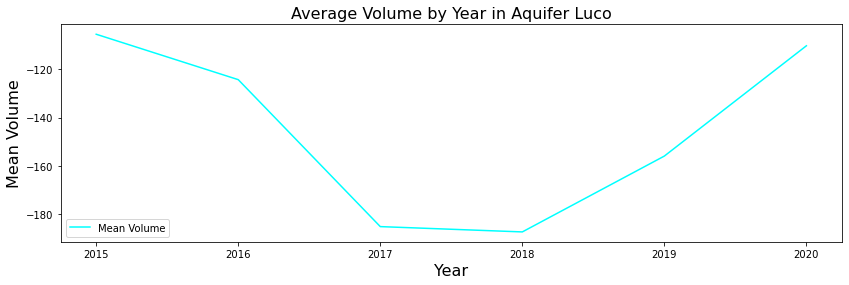

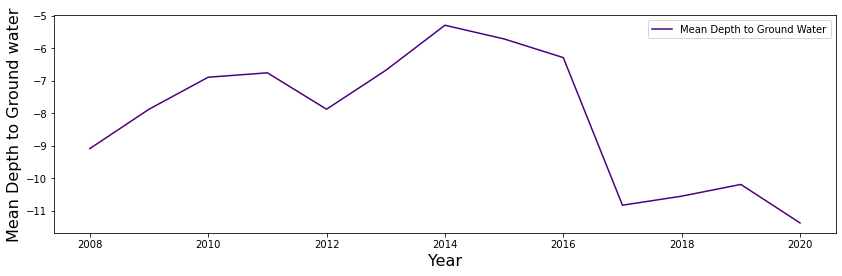

In [45]:
# Aquifer Luco yearly

aquifer_luco_yearly = aquifer_luco.copy()
aquifer_luco_yearly['Year'] = pd.to_datetime(aquifer_luco_yearly['Date']).dt.year.values
aquifer_luco_yearly = aquifer_luco_yearly.groupby('Year').mean()
aquifer_luco_yearly['mean_rainfall'] = aquifer_luco_yearly[['Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento',
       'Rainfall_Mensano', 'Rainfall_Montalcinello',
       'Rainfall_Monticiano_la_Pineta', 'Rainfall_Sovicille',
       'Rainfall_Ponte_Orgia', 'Rainfall_Scorgiano', 'Rainfall_Pentolina',
       'Rainfall_Monteroni_Arbia_Biena']].mean(axis=1)
aquifer_luco_yearly['mean_temp'] = aquifer_luco_yearly[['Temperature_Siena_Poggio_al_Vento',
       'Temperature_Mensano', 'Temperature_Pentolina',
       'Temperature_Monteroni_Arbia_Biena']].mean(axis=1)
aquifer_luco_yearly['mean_volume'] = aquifer_luco_yearly[['Volume_Pozzo_1', 'Volume_Pozzo_3', 'Volume_Pozzo_4']].mean(axis=1)
aquifer_luco_yearly['mean_depth_gwater'] = aquifer_luco_yearly[['Depth_to_Groundwater_Podere_Casetta',
       'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_3',
       'Depth_to_Groundwater_Pozzo_4']].mean(axis=1)
aquifer_luco_yearly = aquifer_luco_yearly.reset_index()


# Plot for  rainfall, temperature, vvolume, depth to ground water features

fig, ax1 = plt.subplots(figsize=(14,4))
#line plot 
ax1.set_title('Average Rainfall and Average Temperature by Year in Aquifer Luco', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_rainfall', data = aquifer_luco_yearly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_temp', data = aquifer_luco_yearly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()


fig, ax1 = plt.subplots(figsize=(14,4))
#line plot 
ax1.set_title('Average Volume by Year in Aquifer Luco', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Volume', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_volume', data = aquifer_luco_yearly, color='aqua',label='Mean Volume')
ax1.tick_params(axis='both')
plt.legend()

plt.figure(figsize=(14,4))
sns.lineplot(x='Year', y='mean_depth_gwater', data = aquifer_luco_yearly, color='indigo',label='Mean Depth to Ground Water')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mean Depth to Ground water', fontsize=16)
plt.legend()
plt.show()

**Observations:**
- The mean volume is deepest in 2017 to 2018 when mean rainfall is low and mean temperature is quite high. The mean depth to ground water is also deep at -10 m in this time period.

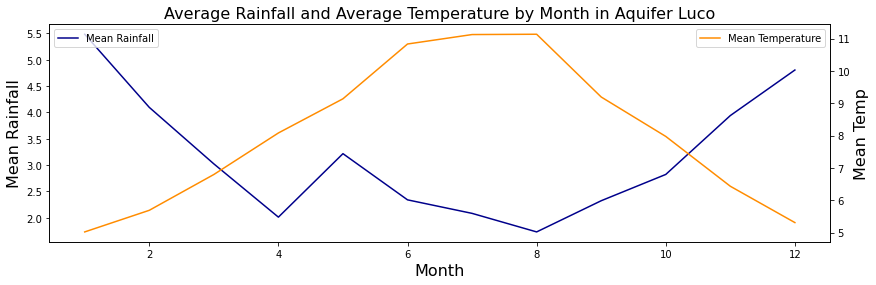

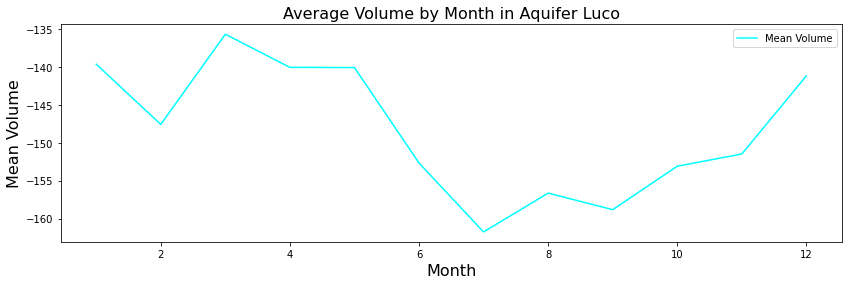

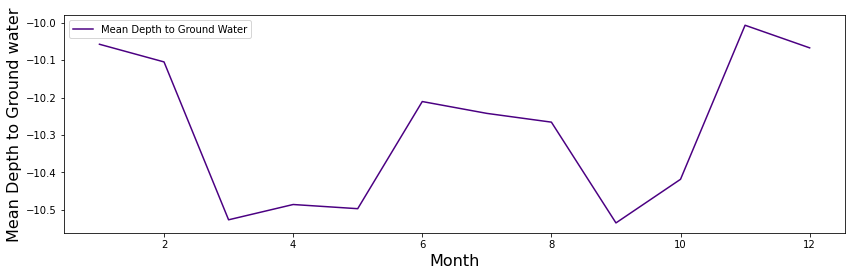

In [46]:
# Aquifer Luco monthly 
aquifer_luco_monthly = aquifer_luco.copy()
aquifer_luco_monthly['Month'] = pd.to_datetime(aquifer_luco_monthly['Date']).dt.month.values
aquifer_luco_monthly = aquifer_luco_monthly.groupby('Month').mean()
aquifer_luco_monthly['mean_rainfall'] = aquifer_luco_monthly[['Rainfall_Simignano', 'Rainfall_Siena_Poggio_al_Vento',
       'Rainfall_Mensano', 'Rainfall_Montalcinello',
       'Rainfall_Monticiano_la_Pineta', 'Rainfall_Sovicille',
       'Rainfall_Ponte_Orgia', 'Rainfall_Scorgiano', 'Rainfall_Pentolina',
       'Rainfall_Monteroni_Arbia_Biena']].mean(axis=1)
aquifer_luco_monthly['mean_temp'] = aquifer_luco_monthly[['Temperature_Siena_Poggio_al_Vento',
       'Temperature_Mensano', 'Temperature_Pentolina',
       'Temperature_Monteroni_Arbia_Biena']].mean(axis=1)
aquifer_luco_monthly['mean_volume'] = aquifer_luco_monthly[['Volume_Pozzo_1', 'Volume_Pozzo_3', 'Volume_Pozzo_4']].mean(axis=1)
aquifer_luco_monthly['mean_depth_gwater'] = aquifer_luco_monthly[['Depth_to_Groundwater_Podere_Casetta',
       'Depth_to_Groundwater_Pozzo_1', 'Depth_to_Groundwater_Pozzo_3',
       'Depth_to_Groundwater_Pozzo_4']].mean(axis=1)
aquifer_luco_monthly = aquifer_luco_monthly.reset_index()


# Plot for rainfall, temperature, volume, depth to ground water features

fig, ax1 = plt.subplots(figsize=(14,4))
#line plot 
ax1.set_title('Average Rainfall and Average Temperature by Month in Aquifer Luco', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_rainfall', data = aquifer_luco_monthly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_temp', data = aquifer_luco_monthly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()


fig, ax1 = plt.subplots(figsize=(14,4))
#line plot 
ax1.set_title('Average Volume by Month in Aquifer Luco', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Volume', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_volume', data = aquifer_luco_monthly, color='aqua',label='Mean Volume')
ax1.tick_params(axis='both')
plt.legend()

plt.figure(figsize=(14,4))
sns.lineplot(x='Month', y='mean_depth_gwater', data = aquifer_luco_monthly, color='indigo',label='Mean Depth to Ground Water')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Mean Depth to Ground water', fontsize=16)
plt.legend()
plt.show()

**Observations:**
- The mean depth to groundwater is the deepest when the mean rainfall and mean temp are moderate. Like in the months of March, May and September. The mean volume is comparatively lower at these times.

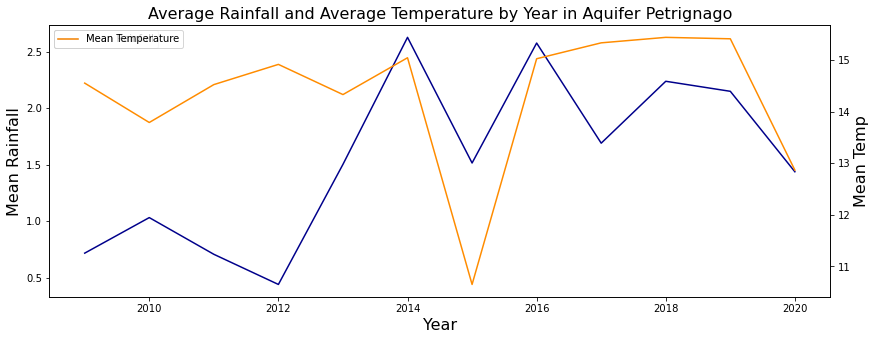

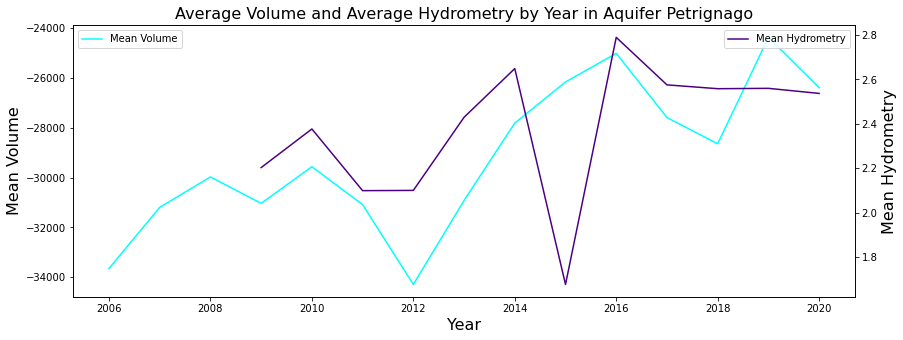

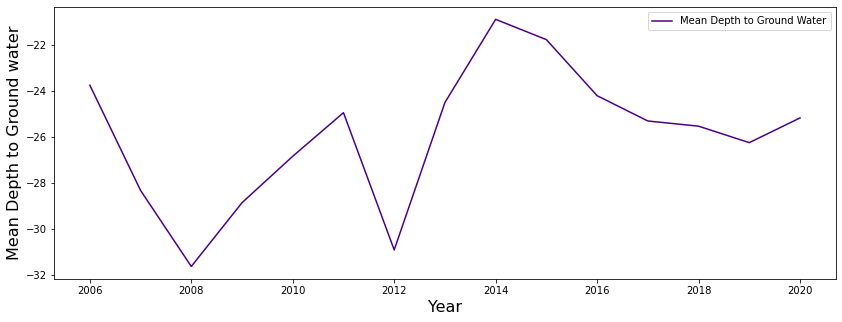

In [47]:
# Aquifer Petrignago yearly 
aquifer_petrignago_yearly = aquifer_petrignago.copy()
aquifer_petrignago_yearly['Year'] = pd.to_datetime(aquifer_petrignago_yearly['Date']).dt.year.values
aquifer_petrignago_yearly = aquifer_petrignago_yearly.groupby('Year').mean()
aquifer_petrignago_yearly['mean_rainfall'] = aquifer_petrignago_yearly[['Rainfall_Bastia_Umbra']].mean(axis=1)
aquifer_petrignago_yearly['mean_temp'] = aquifer_petrignago_yearly[['Temperature_Bastia_Umbra',
       'Temperature_Petrignano']].mean(axis=1)
aquifer_petrignago_yearly['mean_volume'] = aquifer_petrignago_yearly[['Volume_C10_Petrignano']].mean(axis=1)
aquifer_petrignago_yearly['mean_hydrometry'] = aquifer_petrignago_yearly[['Hydrometry_Fiume_Chiascio_Petrignano']].mean(axis=1)
aquifer_petrignago_yearly['mean_depth_gwater'] = aquifer_petrignago_yearly[['Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25']].mean(axis=1)

aquifer_petrignago_yearly = aquifer_petrignago_yearly.reset_index()


# Plot for rainfall, temperature, volume, hydrometry and the depth to ground water

fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Average Temperature by Year in Aquifer Petrignago', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_rainfall', data = aquifer_petrignago_yearly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_temp', data = aquifer_petrignago_yearly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Volume and Average Hydrometry by Year in Aquifer Petrignago', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Volume', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_volume', data = aquifer_petrignago_yearly, color='aqua',label='Mean Volume')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')


ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Hydrometry', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_hydrometry', data = aquifer_petrignago_yearly, color='indigo',label='Mean Hydrometry')
ax2.tick_params(axis='both')
plt.legend()
plt.show()

plt.figure(figsize=(14,5))
sns.lineplot(x='Year', y='mean_depth_gwater', data = aquifer_petrignago_yearly, color='indigo',label='Mean Depth to Ground Water')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mean Depth to Ground water', fontsize=16)
plt.legend()
plt.show()

**Observations:**
- When mean rainfall is low and mean temp is high, when mean volume is deep and hydrometry is moderate, is when the mean depth to ground water is the highest. Like in the year 2008 and 2012, it is the deepest at -32 m.

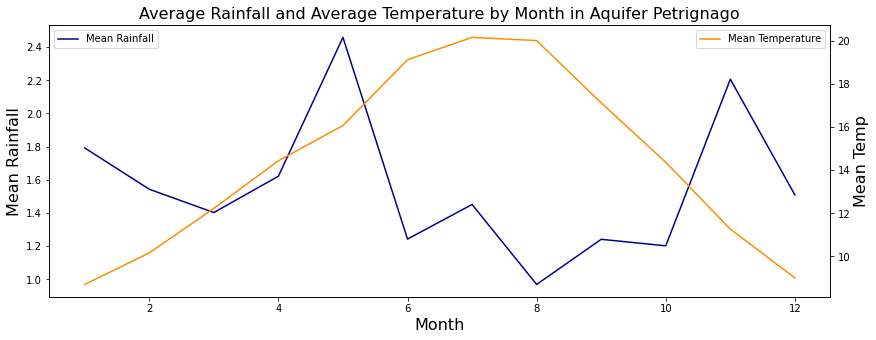

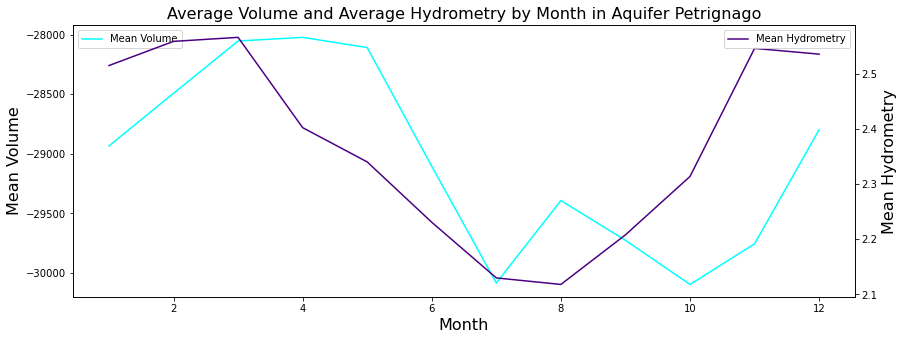

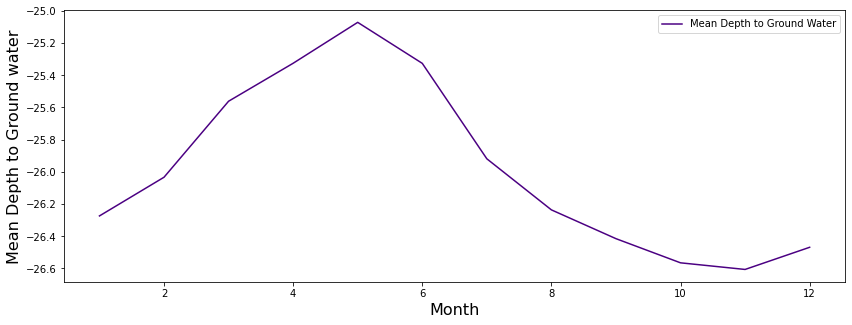

In [48]:
# Aquifer Petrignago monthly
aquifer_petrignago_monthly = aquifer_petrignago.copy()
aquifer_petrignago_monthly['Month'] = pd.to_datetime(aquifer_petrignago_monthly['Date']).dt.month.values
aquifer_petrignago_monthly = aquifer_petrignago_monthly.groupby('Month').mean()
aquifer_petrignago_monthly['mean_rainfall'] = aquifer_petrignago_monthly[['Rainfall_Bastia_Umbra']].mean(axis=1)
aquifer_petrignago_monthly['mean_temp'] = aquifer_petrignago_monthly[['Temperature_Bastia_Umbra',
       'Temperature_Petrignano']].mean(axis=1)
aquifer_petrignago_monthly['mean_volume'] = aquifer_petrignago_monthly[['Volume_C10_Petrignano']].mean(axis=1)
aquifer_petrignago_monthly['mean_hydrometry'] = aquifer_petrignago_monthly[['Hydrometry_Fiume_Chiascio_Petrignano']].mean(axis=1)
aquifer_petrignago_monthly['mean_depth_gwater'] = aquifer_petrignago_monthly[['Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25']].mean(axis=1)

aquifer_petrignago_monthly = aquifer_petrignago_monthly.reset_index()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Average Temperature by Month in Aquifer Petrignago', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_rainfall', data = aquifer_petrignago_monthly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_temp', data = aquifer_petrignago_monthly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Volume and Average Hydrometry by Month in Aquifer Petrignago', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Volume', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_volume', data = aquifer_petrignago_monthly, color='aqua',label='Mean Volume')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')


ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Hydrometry', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_hydrometry', data = aquifer_petrignago_monthly, color='indigo',label='Mean Hydrometry')
ax2.tick_params(axis='both')
plt.legend()
plt.show()

plt.figure(figsize=(14,5))
sns.lineplot(x='Month', y='mean_depth_gwater', data = aquifer_petrignago_monthly, color='indigo',label='Mean Depth to Ground Water')
plt.xlabel('Month', fontsize=16)
plt.ylabel('Mean Depth to Ground water', fontsize=16)
plt.legend()
plt.show()

**Observations:**
- High mean rainfall, low mean temp,increased mean hydrometry and reduced mean volume produce the deepest mean depth to groundwater in the months of October, November and December.

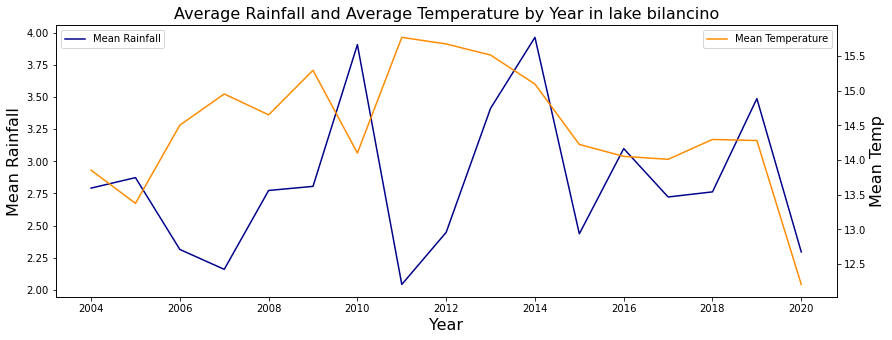

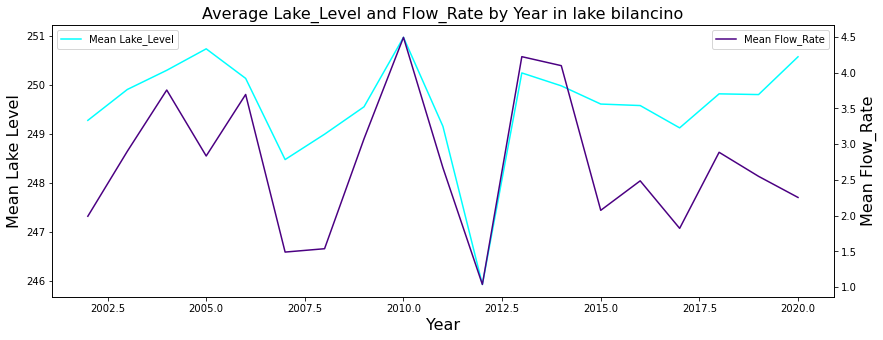

In [50]:
# Lake Bilancino yearly

lake_bilancino_yearly = lake_bilancino.copy()
lake_bilancino_yearly['Year'] = pd.to_datetime(lake_bilancino_yearly['Date']).dt.year.values
lake_bilancino_yearly = lake_bilancino_yearly.groupby('Year').mean()
lake_bilancino_yearly['mean_rainfall'] = lake_bilancino_yearly[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci']].mean(axis=1)
lake_bilancino_yearly['mean_temp'] = lake_bilancino_yearly[['Temperature_Le_Croci']].mean(axis=1)
lake_bilancino_yearly['mean_lake_level'] = lake_bilancino_yearly[['Lake_Level']].mean(axis=1)
lake_bilancino_yearly['mean_flow_rate'] = lake_bilancino_yearly[['Flow_Rate']].mean(axis=1)

lake_bilancino_yearly = lake_bilancino_yearly.reset_index()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Average Temperature by Year in lake bilancino', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_rainfall', data = lake_bilancino_yearly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_temp', data = lake_bilancino_yearly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Lake_Level and Flow_Rate by Year in lake bilancino', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Lake Level', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_lake_level', data = lake_bilancino_yearly, color='aqua',label='Mean Lake_Level')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')


ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Flow_Rate', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_flow_rate', data = lake_bilancino_yearly, color='indigo',label='Mean Flow_Rate')
ax2.tick_params(axis='both')
plt.legend()
plt.show()

**Observations:**
- The patterns in mean lake level and mean flow rate are almost overlapping. Both seem to increase or decrease proportionally. Lake level, hydrometry is low when mean temperature is high and rainfall is low like in 2012. 

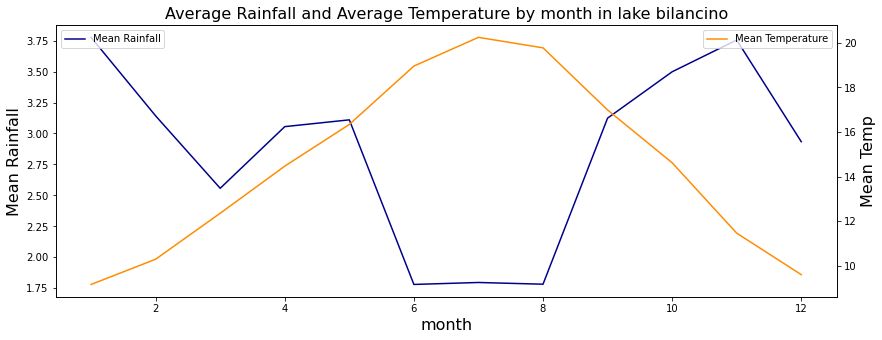

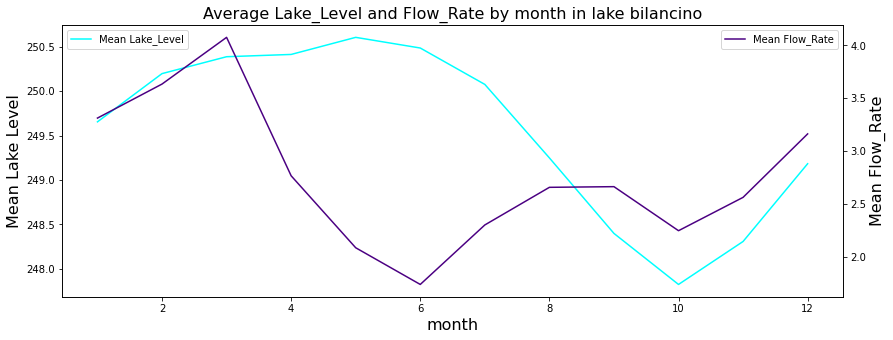

In [51]:
# Lake bilalcino monthly 

lake_bilancino_monthly = lake_bilancino.copy()
lake_bilancino_monthly['month'] = pd.to_datetime(lake_bilancino_monthly['Date']).dt.month.values
lake_bilancino_monthly = lake_bilancino_monthly.groupby('month').mean()
lake_bilancino_monthly['mean_rainfall'] = lake_bilancino_monthly[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci']].mean(axis=1)
lake_bilancino_monthly['mean_temp'] = lake_bilancino_monthly[['Temperature_Le_Croci']].mean(axis=1)
lake_bilancino_monthly['mean_lake_level'] = lake_bilancino_monthly[['Lake_Level']].mean(axis=1)
lake_bilancino_monthly['mean_flow_rate'] = lake_bilancino_monthly[['Flow_Rate']].mean(axis=1)

lake_bilancino_monthly = lake_bilancino_monthly.reset_index()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Average Temperature by month in lake bilancino', fontsize=16)
ax1.set_xlabel('month', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='month', y='mean_rainfall', data = lake_bilancino_monthly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='month', y='mean_temp', data = lake_bilancino_monthly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Lake_Level and Flow_Rate by month in lake bilancino', fontsize=16)
ax1.set_xlabel('month', fontsize=16)
ax1.set_ylabel('Mean Lake Level', fontsize=16)
ax1 = sns.lineplot(x='month', y='mean_lake_level', data = lake_bilancino_monthly, color='aqua',label='Mean Lake_Level')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')


ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Flow_Rate', fontsize=16)
ax2 = sns.lineplot(x='month', y='mean_flow_rate', data = lake_bilancino_monthly, color='indigo',label='Mean Flow_Rate')
ax2.tick_params(axis='both')
plt.legend()
plt.show()

**Observations:**
- Average lake level and flow rate appear to be contradicting each other in the months of March to September and linearly similarly for rest of the months. This happens when there is very low rainfall and high temp from March to September resulting in high lake level and low flow rate.

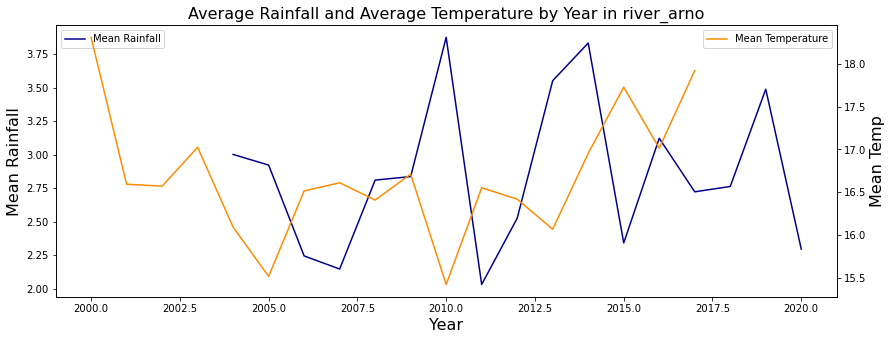

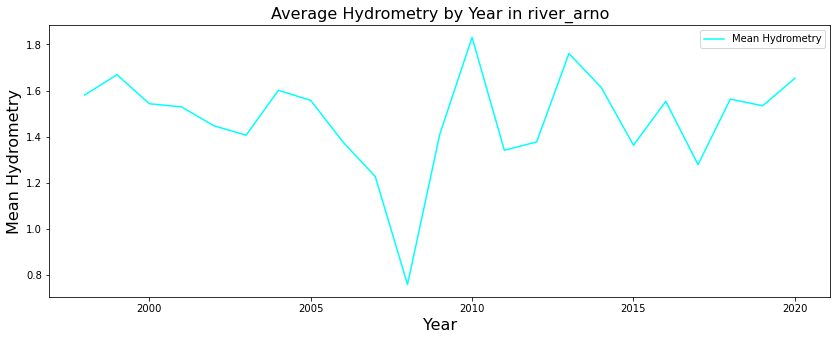

In [52]:
#River Arno yearly

river_arno_yearly = river_arno.copy()
river_arno_yearly['Year'] = pd.to_datetime(river_arno_yearly['Date']).dt.year.values
river_arno_yearly = river_arno_yearly.groupby('Year').mean()
river_arno_yearly['mean_rainfall'] = river_arno_yearly[['Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli']].mean(axis=1)
river_arno_yearly['mean_temp'] = river_arno_yearly[['Temperature_Firenze']].mean(axis=1)
river_arno_yearly['mean_hydrometry'] = river_arno_yearly[['Hydrometry_Nave_di_Rosano']].mean(axis=1)

river_arno_yearly = river_arno_yearly.reset_index()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Average Temperature by Year in river_arno', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_rainfall', data = river_arno_yearly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_temp', data = river_arno_yearly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Hydrometry by Year in river_arno', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Hydrometry', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_hydrometry', data = river_arno_yearly, color='aqua',label='Mean Hydrometry')
ax1.tick_params(axis='both')
plt.legend()
plt.show()

**Observations:**
- High average hydrometry is observed when mean rainfall is high and mean temp is low like in 2010.

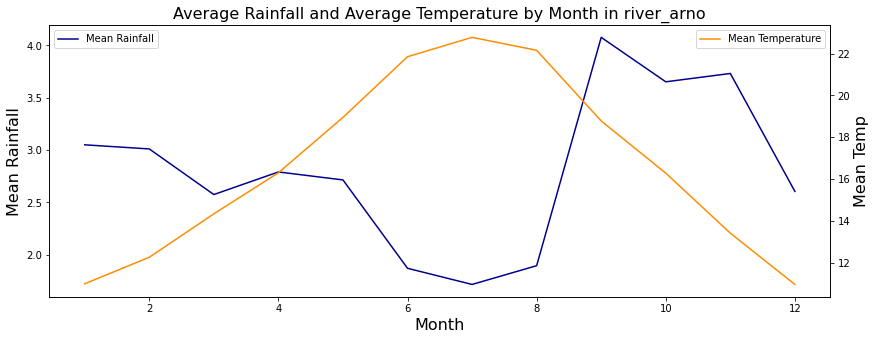

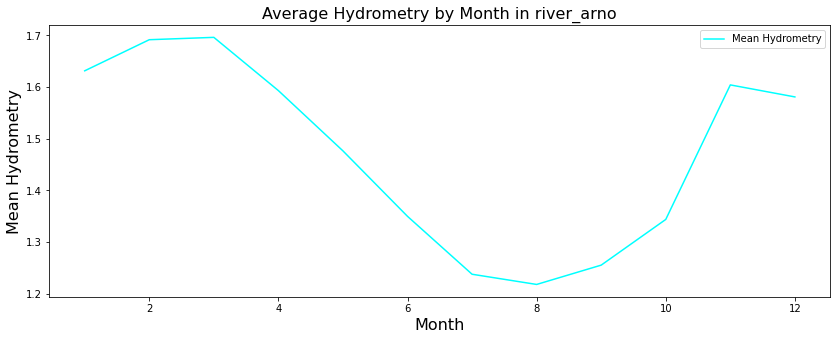

In [53]:
# River Arno monthly

river_arno_monthly = river_arno.copy()
river_arno_monthly['Month'] = pd.to_datetime(river_arno_monthly['Date']).dt.month.values
river_arno_monthly = river_arno_monthly.groupby('Month').mean()
river_arno_monthly['mean_rainfall'] = river_arno_monthly[['Rainfall_Le_Croci', 'Rainfall_Cavallina', 'Rainfall_S_Agata',
       'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio',
       'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa',
       'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina',
       'Rainfall_Bibbiena', 'Rainfall_Camaldoli']].mean(axis=1)
river_arno_monthly['mean_temp'] = river_arno_monthly[['Temperature_Firenze']].mean(axis=1)
river_arno_monthly['mean_hydrometry'] = river_arno_monthly[['Hydrometry_Nave_di_Rosano']].mean(axis=1)

river_arno_monthly = river_arno_monthly.reset_index()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Average Temperature by Month in river_arno', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_rainfall', data = river_arno_monthly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_temp', data = river_arno_monthly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Hydrometry by Month in river_arno', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Hydrometry', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_hydrometry', data = river_arno_monthly, color='aqua',label='Mean Hydrometry')
ax1.tick_params(axis='both')
plt.legend()
plt.show()

**Observations:**
- High average hydrometry is observed when mean rainfall is high and temperature is moderate, like in the months of Jan-Mar and Oct-Dec.

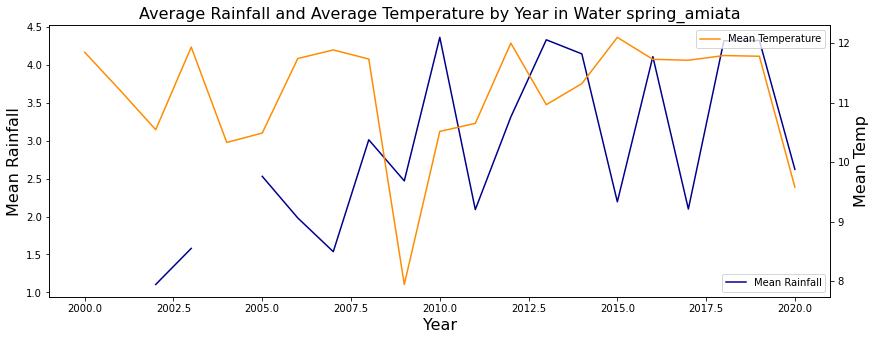

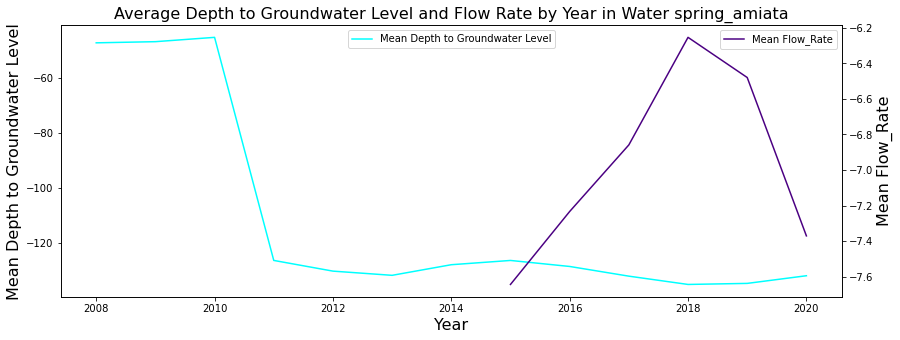

In [54]:
# Water spring amiata yearly 

spring_amiata_yearly = spring_amiata.copy()
spring_amiata_yearly['Year'] = pd.to_datetime(spring_amiata_yearly['Date']).dt.year.values
spring_amiata_yearly = spring_amiata_yearly.groupby('Year').mean()
spring_amiata_yearly['mean_rainfall'] = spring_amiata_yearly[['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata']].mean(axis=1)
spring_amiata_yearly['mean_temp'] = spring_amiata_yearly[['Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde']].mean(axis=1)
spring_amiata_yearly['mean_depth_gwater'] = spring_amiata_yearly[['Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',]].mean(axis=1)
spring_amiata_yearly['mean_flow_rate'] = spring_amiata_yearly[['Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']].mean(axis=1)

spring_amiata_yearly = spring_amiata_yearly.reset_index()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Average Temperature by Year in Water spring_amiata', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_rainfall', data = spring_amiata_yearly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='lower right')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_temp', data = spring_amiata_yearly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend(loc='best')
plt.show()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Depth to Groundwater Level and Flow Rate by Year in Water spring_amiata', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Depth to Groundwater Level', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_depth_gwater', data = spring_amiata_yearly, color='aqua',label='Mean Depth to Groundwater Level')
ax1.tick_params(axis='both')
plt.legend(loc='upper center')


ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Flow_Rate', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_flow_rate', data = spring_amiata_yearly, color='indigo',label='Mean Flow_Rate')
ax2.tick_params(axis='both')
plt.legend(loc='best')
plt.show()

**Observations:**
- Average flow rate is high when mean rainfall is low and temperature is high like in 2015 and 2020. Average flow rate is low when both mean rainfall and temperature are high.

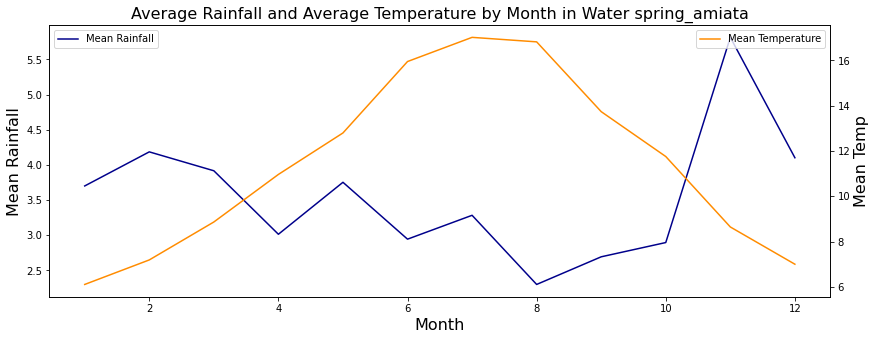

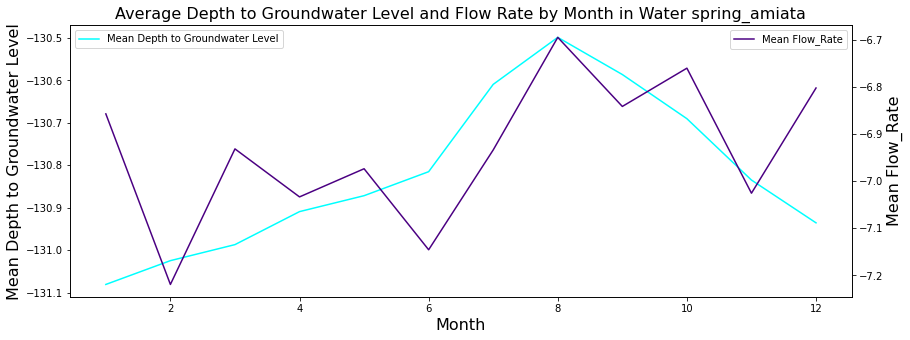

In [55]:
#Spring Amiata monthly

spring_amiata_monthly = spring_amiata.copy()
spring_amiata_monthly['Month'] = pd.to_datetime(spring_amiata_monthly['Date']).dt.month.values
spring_amiata_monthly = spring_amiata_monthly.groupby('Month').mean()
spring_amiata_monthly['mean_rainfall'] = spring_amiata_monthly[['Rainfall_Castel_del_Piano', 'Rainfall_Abbadia_S_Salvatore',
       'Rainfall_S_Fiora', 'Rainfall_Laghetto_Verde', 'Rainfall_Vetta_Amiata']].mean(axis=1)
spring_amiata_monthly['mean_temp'] = spring_amiata_monthly[['Temperature_Abbadia_S_Salvatore', 'Temperature_S_Fiora',
       'Temperature_Laghetto_Verde']].mean(axis=1)
spring_amiata_monthly['mean_depth_gwater'] = spring_amiata_monthly[['Depth_to_Groundwater_S_Fiora_8', 'Depth_to_Groundwater_S_Fiora_11bis',
       'Depth_to_Groundwater_David_Lazzaretti',]].mean(axis=1)
spring_amiata_monthly['mean_flow_rate'] = spring_amiata_monthly[['Flow_Rate_Bugnano', 'Flow_Rate_Arbure',
       'Flow_Rate_Ermicciolo', 'Flow_Rate_Galleria_Alta']].mean(axis=1)

spring_amiata_monthly = spring_amiata_monthly.reset_index()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Average Temperature by Month in Water spring_amiata', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_rainfall', data = spring_amiata_monthly, color='darkblue',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')

ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Temp', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_temp', data = spring_amiata_monthly, color='darkorange',label='Mean Temperature')
ax2.tick_params(axis='both')
plt.legend()
plt.show()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Depth to Groundwater Level and Flow Rate by Month in Water spring_amiata', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Depth to Groundwater Level', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_depth_gwater', data = spring_amiata_monthly, color='aqua',label='Mean Depth to Groundwater Level')
ax1.tick_params(axis='both')
plt.legend(loc='upper left')


ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Flow_Rate', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_flow_rate', data = spring_amiata_monthly, color='indigo',label='Mean Flow_Rate')
ax2.tick_params(axis='both')
plt.legend()
plt.show()

**Observations:**
- Mean flow rate has a nice relationship with mean depth to ground water. High depth to ground water mostly also shows high flow rate.
- High flow rate is observed in Feb, Jun, November when temp is low and rainfall is moderate to high.

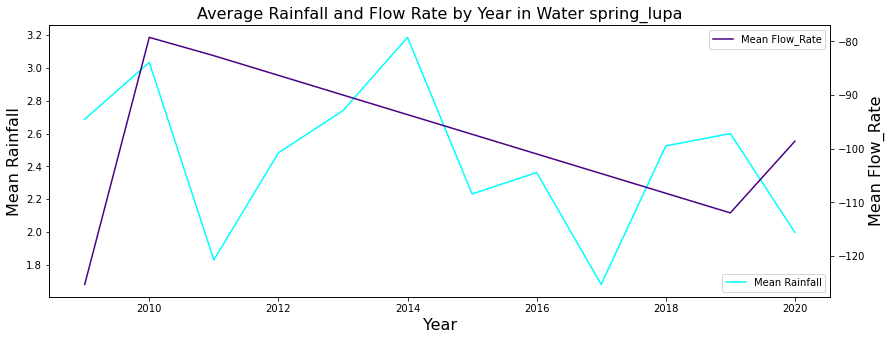

In [56]:
# Spring Lupa yearly

spring_lupa_yearly = spring_lupa.copy()
spring_lupa_yearly['Year'] = pd.to_datetime(spring_lupa_yearly['Date']).dt.year.values
spring_lupa_yearly = spring_lupa_yearly.groupby('Year').mean()
spring_lupa_yearly['mean_rainfall'] = spring_lupa_yearly['Rainfall_Terni']
spring_lupa_yearly['mean_flow_rate'] = spring_lupa_yearly['Flow_Rate_Lupa']

spring_lupa_yearly = spring_lupa_yearly.reset_index()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Flow Rate by Year in Water spring_lupa', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_rainfall', data = spring_lupa_yearly, color='aqua',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='lower right')



ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Flow_Rate', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_flow_rate', data = spring_lupa_yearly, color='indigo',label='Mean Flow_Rate')
ax2.tick_params(axis='both')
plt.legend(loc='best')
plt.show()

**Observations:**
- Average rainfall is observed to be greatly fluctuating over each year. Generally higher mean flow rate is observed for high mean rainfall.

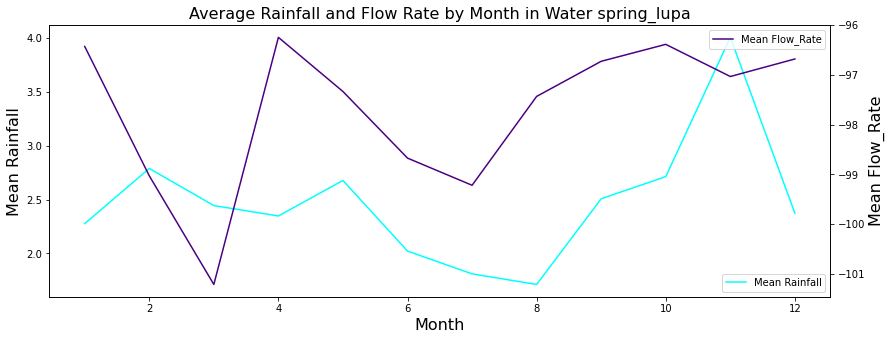

In [57]:
# Spring Lupa monthly

spring_lupa_monthly = spring_lupa.copy()
spring_lupa_monthly['Month'] = pd.to_datetime(spring_lupa_monthly['Date']).dt.month.values
spring_lupa_monthly = spring_lupa_monthly.groupby('Month').mean()
spring_lupa_monthly['mean_rainfall'] = spring_lupa_monthly['Rainfall_Terni']
spring_lupa_monthly['mean_flow_rate'] = spring_lupa_monthly['Flow_Rate_Lupa']

spring_lupa_monthly = spring_lupa_monthly.reset_index()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Flow Rate by Month in Water spring_lupa', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_rainfall', data = spring_lupa_monthly, color='aqua',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='lower right')



ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Flow_Rate', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_flow_rate', data = spring_lupa_monthly, color='indigo',label='Mean Flow_Rate')
ax2.tick_params(axis='both')
plt.legend(loc='best')
plt.show()

**Observations:**
- High mean flow rates are associated with moderate to low mean rainfall. As the mean rainfall increases from August to November, the mean flow rate starts to fall.

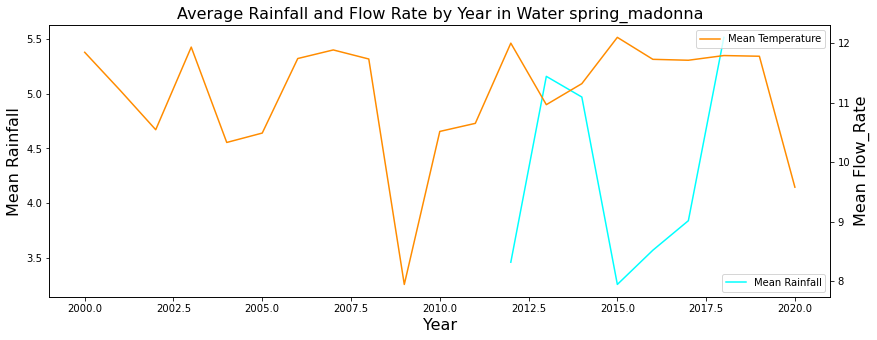

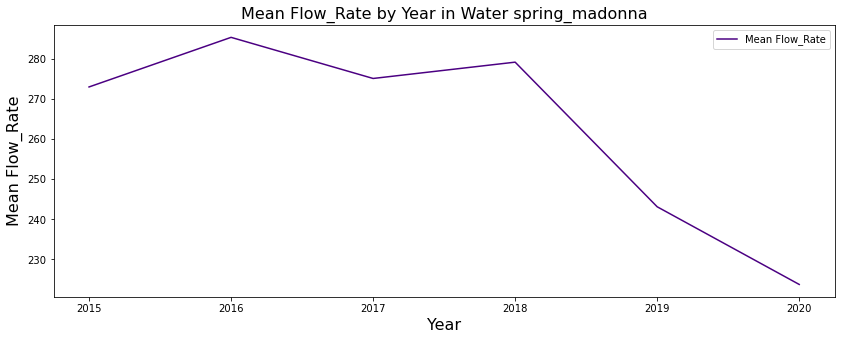

In [58]:
# Spring Madonna yearly

spring_madonna_yearly = spring_madonna.copy()
spring_madonna_yearly['Year'] = pd.to_datetime(spring_madonna_yearly['Date']).dt.year.values
spring_madonna_yearly = spring_madonna_yearly.groupby('Year').mean()
spring_madonna_yearly['mean_rainfall'] = spring_madonna_yearly['Rainfall_Settefrati']
spring_madonna_yearly['mean_temp'] = spring_madonna_yearly['Temperature_Settefrati']
spring_madonna_yearly['mean_flow_rate'] = spring_madonna_yearly['Flow_Rate_Madonna_di_Canneto']

spring_madonna_yearly = spring_madonna_yearly.reset_index()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Flow Rate by Year in Water spring_madonna', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_rainfall', data = spring_madonna_yearly, color='aqua',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='lower right')



ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Flow_Rate', fontsize=16)
ax2 = sns.lineplot(x='Year', y='mean_temp', data = spring_amiata_yearly, color='darkorange',label='Mean Temperature')

ax2.tick_params(axis='both')
plt.legend(loc='best')
plt.show()

fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Mean Flow_Rate by Year in Water spring_madonna', fontsize=16)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Mean Flow_Rate', fontsize=16)
ax1 = sns.lineplot(x='Year', y='mean_flow_rate', data = spring_madonna_yearly, color='indigo',label='Mean Flow_Rate')
ax1.tick_params(axis='both')
plt.legend()
plt.show()

**Observations:**
- From the year 2015 to 2017, as the mean rainfall and mean temp are high, the mean flow rate also increases.

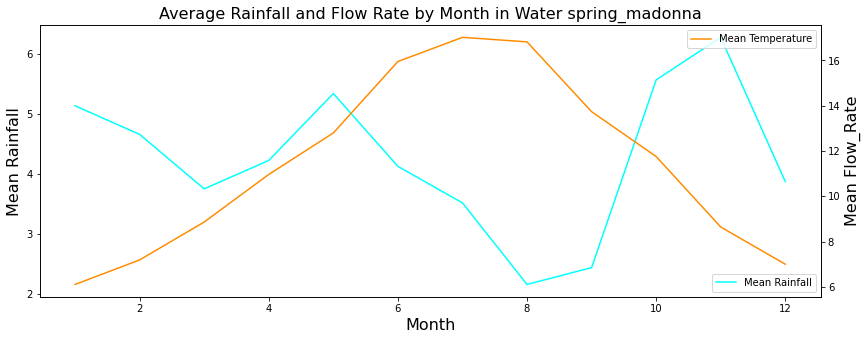

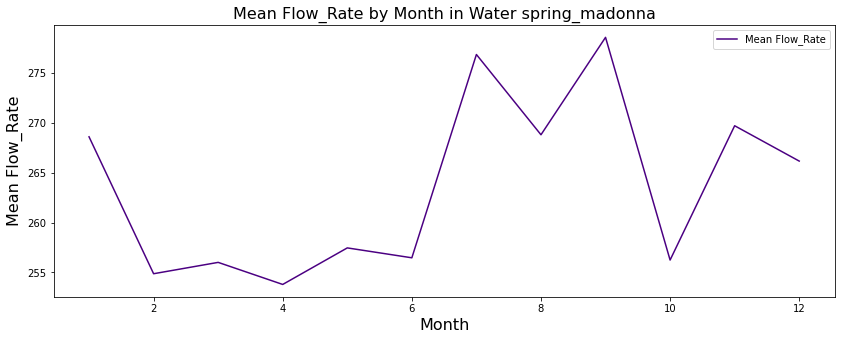

In [59]:
# Spring madonna monthly

spring_madonna_monthly = spring_madonna.copy()
spring_madonna_monthly['Month'] = pd.to_datetime(spring_madonna_monthly['Date']).dt.month.values
spring_madonna_monthly = spring_madonna_monthly.groupby('Month').mean()
spring_madonna_monthly['mean_rainfall'] = spring_madonna_monthly['Rainfall_Settefrati']
spring_madonna_monthly['mean_temp'] = spring_madonna_monthly['Temperature_Settefrati']
spring_madonna_monthly['mean_flow_rate'] = spring_madonna_monthly['Flow_Rate_Madonna_di_Canneto']

spring_madonna_monthly = spring_madonna_monthly.reset_index()



fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Average Rainfall and Flow Rate by Month in Water spring_madonna', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Rainfall', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_rainfall', data = spring_madonna_monthly, color='aqua',label='Mean Rainfall')
ax1.tick_params(axis='both')
plt.legend(loc='lower right')



ax2 = ax1.twinx()
#line plot
ax2.set_ylabel('Mean Flow_Rate', fontsize=16)
ax2 = sns.lineplot(x='Month', y='mean_temp', data = spring_amiata_monthly, color='darkorange',label='Mean Temperature')

ax2.tick_params(axis='both')
plt.legend(loc='best')
plt.show()

fig, ax1 = plt.subplots(figsize=(14,5))
#line plot 
ax1.set_title('Mean Flow_Rate by Month in Water spring_madonna', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Mean Flow_Rate', fontsize=16)
ax1 = sns.lineplot(x='Month', y='mean_flow_rate', data = spring_madonna_monthly, color='indigo',label='Mean Flow_Rate')
ax1.tick_params(axis='both')
plt.legend()
plt.show()

**Observations:**
- The mean flow rate is highest in the months of July, August, September when the mean rainfall is very low and mean temperature is high.